# Forest Cover Type prediction competition

In [262]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.ensemble
import os
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

## 1. Data Preprocessing

In [91]:
train_data = pd.read_csv('data/train.csv')
test_data = pd.read_csv('data/test.csv')

In [89]:
train_data['Cover_Type'].unique()

array([5, 2, 1, 7, 3, 6, 4], dtype=int64)

In [9]:
train_data.describe()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,15120.00000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,...,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,7560.50000,2749.322553,156.676653,16.501587,227.195701,51.076521,1714.023214,212.704299,218.965608,135.091997,...,0.045635,0.040741,0.001455,0.006746,0.000661,0.002249,0.048148,0.043452,0.030357,4.000000
std,4364.91237,417.678187,110.085801,8.453927,210.075296,61.239406,1325.066358,30.561287,22.801966,45.895189,...,0.208699,0.197696,0.038118,0.081859,0.025710,0.047368,0.214086,0.203880,0.171574,2.000066
min,1.00000,1863.000000,0.000000,0.000000,0.000000,-146.000000,0.000000,0.000000,99.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3780.75000,2376.000000,65.000000,10.000000,67.000000,5.000000,764.000000,196.000000,207.000000,106.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,7560.50000,2752.000000,126.000000,15.000000,180.000000,32.000000,1316.000000,220.000000,223.000000,138.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,11340.25000,3104.000000,261.000000,22.000000,330.000000,79.000000,2270.000000,235.000000,235.000000,167.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
max,15120.00000,3849.000000,360.000000,52.000000,1343.000000,554.000000,6890.000000,254.000000,254.000000,248.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [11]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 56 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Id                                  15120 non-null  int64
 1   Elevation                           15120 non-null  int64
 2   Aspect                              15120 non-null  int64
 3   Slope                               15120 non-null  int64
 4   Horizontal_Distance_To_Hydrology    15120 non-null  int64
 5   Vertical_Distance_To_Hydrology      15120 non-null  int64
 6   Horizontal_Distance_To_Roadways     15120 non-null  int64
 7   Hillshade_9am                       15120 non-null  int64
 8   Hillshade_Noon                      15120 non-null  int64
 9   Hillshade_3pm                       15120 non-null  int64
 10  Horizontal_Distance_To_Fire_Points  15120 non-null  int64
 11  Wilderness_Area1                    15120 non-null  int64
 12  Wild

In [13]:
train_data.nunique()

Id                                    15120
Elevation                              1665
Aspect                                  361
Slope                                    52
Horizontal_Distance_To_Hydrology        400
Vertical_Distance_To_Hydrology          423
Horizontal_Distance_To_Roadways        3250
Hillshade_9am                           176
Hillshade_Noon                          141
Hillshade_3pm                           247
Horizontal_Distance_To_Fire_Points     2710
Wilderness_Area1                          2
Wilderness_Area2                          2
Wilderness_Area3                          2
Wilderness_Area4                          2
Soil_Type1                                2
Soil_Type2                                2
Soil_Type3                                2
Soil_Type4                                2
Soil_Type5                                2
Soil_Type6                                2
Soil_Type7                                1
Soil_Type8                      

In [634]:
#separate binary and numerical columns
target = train_data['Cover_Type']
train_data = train_data.loc[:, train_data.nunique() != 1]

bin_cols = train_data.loc[:, train_data.nunique() == 2]
num_cols = train_data.drop(columns = bin_cols.columns.tolist()+['Id'])

In [40]:
num_cols.nunique()

Elevation                             1665
Aspect                                 361
Slope                                   52
Horizontal_Distance_To_Hydrology       400
Vertical_Distance_To_Hydrology         423
Horizontal_Distance_To_Roadways       3250
Hillshade_9am                          176
Hillshade_Noon                         141
Hillshade_3pm                          247
Horizontal_Distance_To_Fire_Points    2710
dtype: int64

## 2. EDA

**Binary Columns (All binary columns were one-hot encoded multi-categorial variables):** 

   
- **Soil Type:** 
    - For soil types there were some more dominant soil types, number 10 was dominant by 14% and many were under 1%. I am dropping soil_types under 1% except soil type 35, it has a highly imbalanced target distribution, contributing to almost a 100 cover type 7 and nothing else. 
    - Soil_Type columns are one-hot encoded, 40 variables seems a bit much and random forest can handle multi categorical data so I merged them into 1 Soil_Type column

- **Wilderness Area:**
    - For Wilderness Area 1,3,4 were the most frequent, 2 were only represented in 3.30% of cases.
    - The target distribution conditional to Wilderness Are 2 doesn't seem extremely imbalanced, dropping it
      
- Also I merged remaining soil types and wilderness area into 1-1 col

**Numerical Columns:**
 - Most features have a skewed distribution but that shouldnt be a problem for random forest classifier. Elevation was trimodal.
 - There were many outliers when visualizing boxplots but that is understandable for the distributions were skewed
 - Target feature is balanced
 - Correlation matrix:
     - Soil Type and Elevation are highly correlated
     

**Visualizing Distribution for Binary columns**

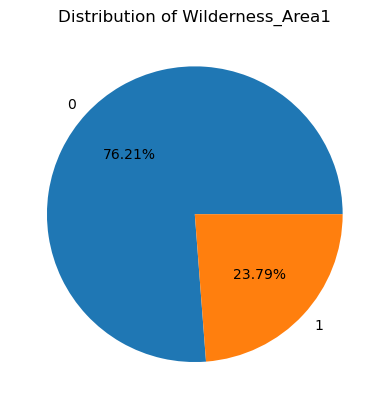

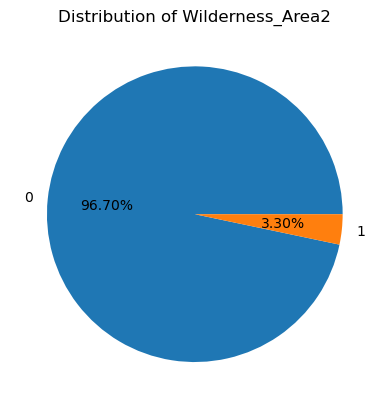

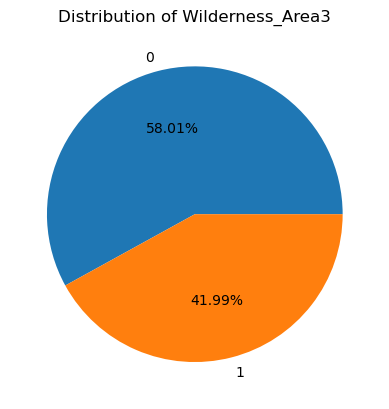

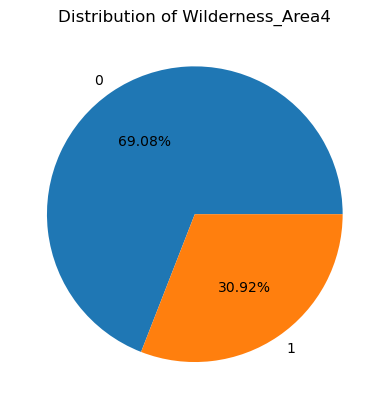

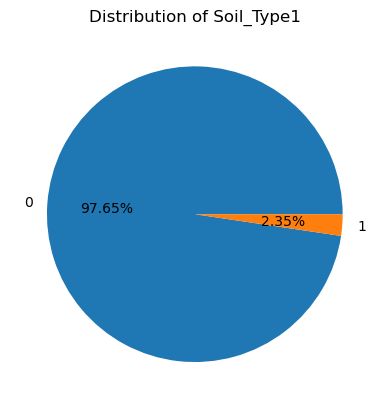

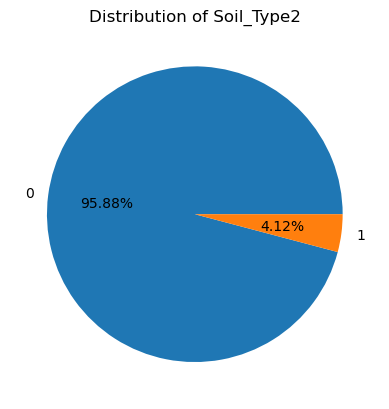

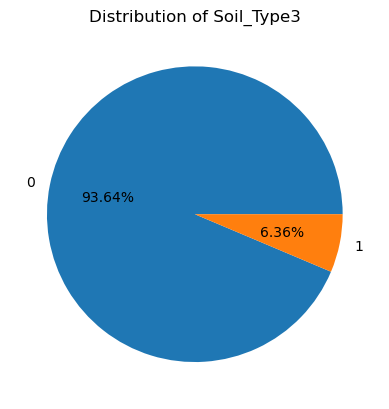

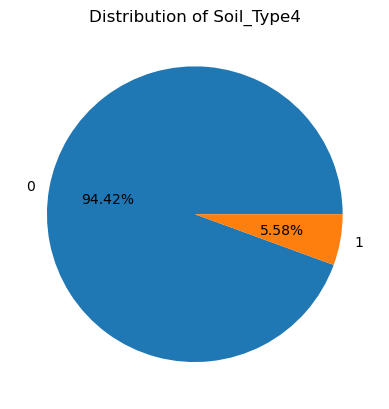

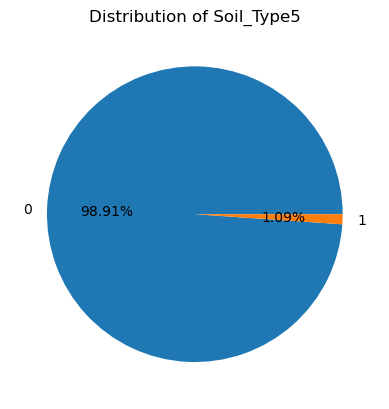

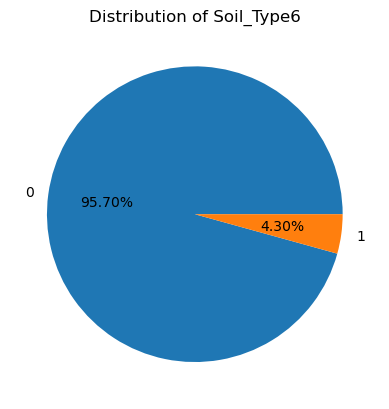

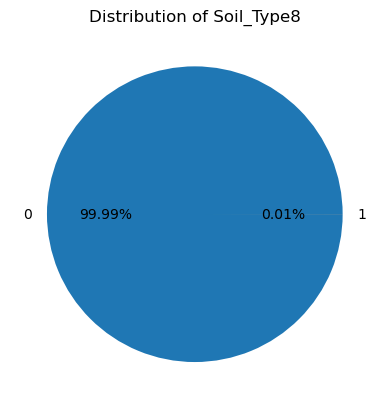

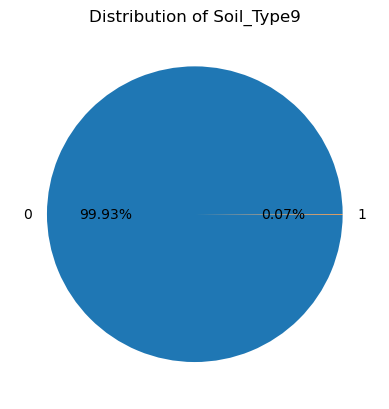

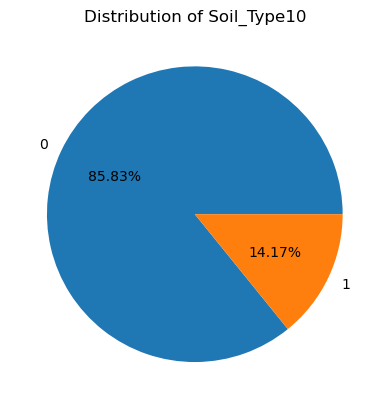

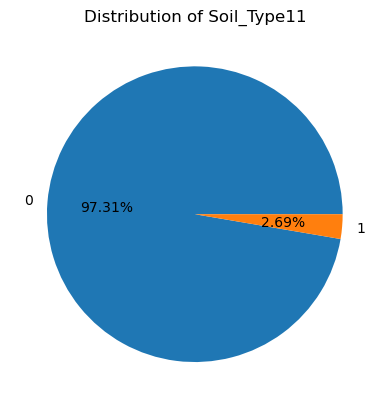

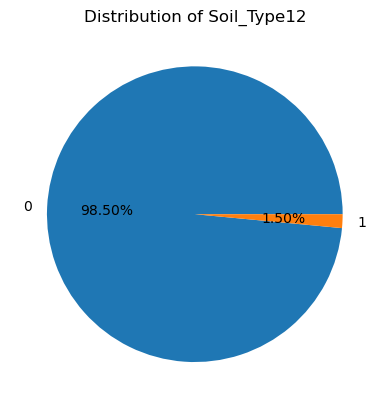

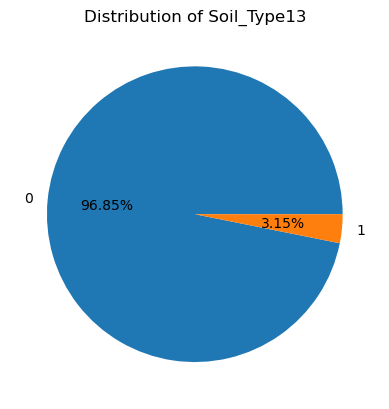

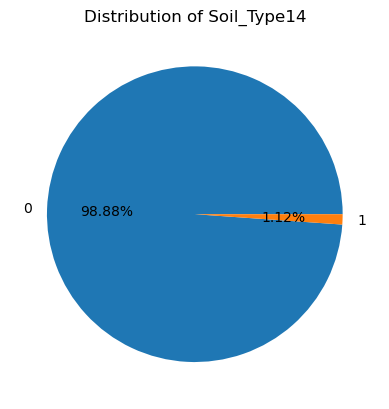

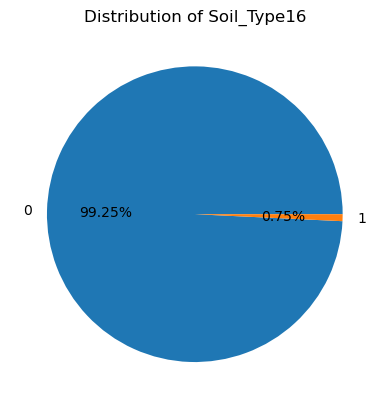

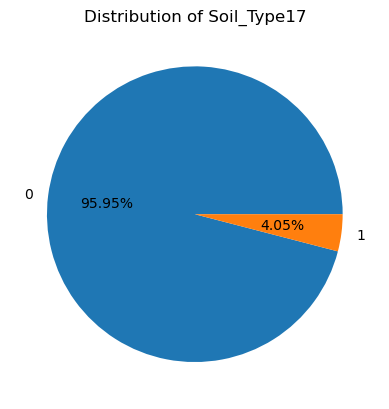

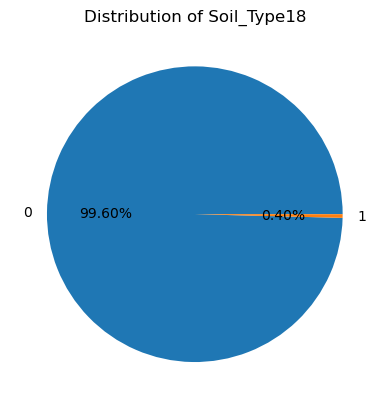

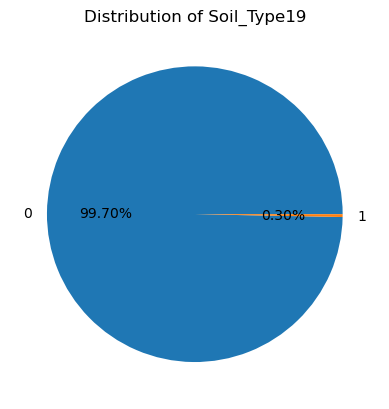

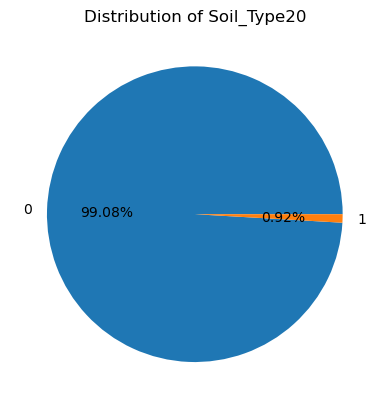

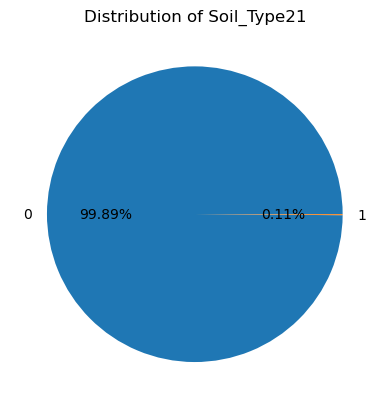

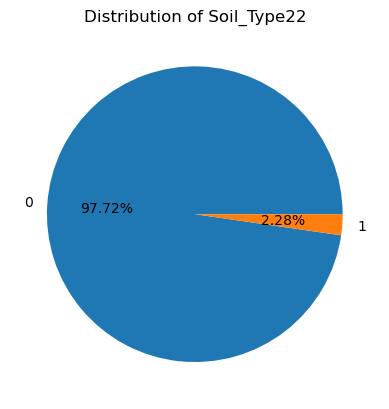

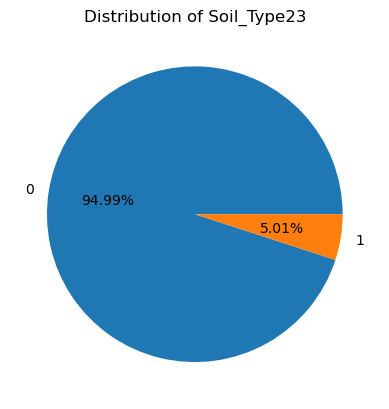

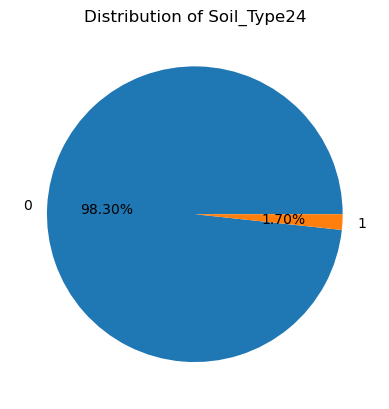

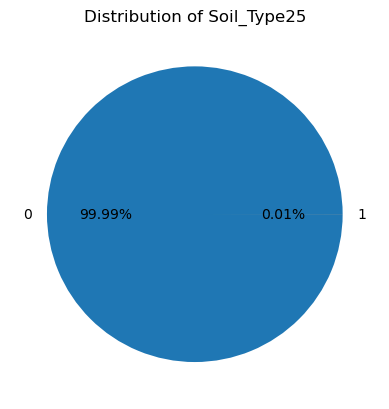

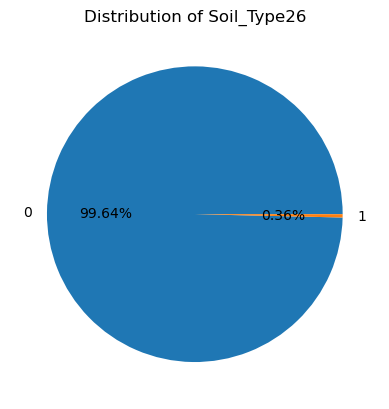

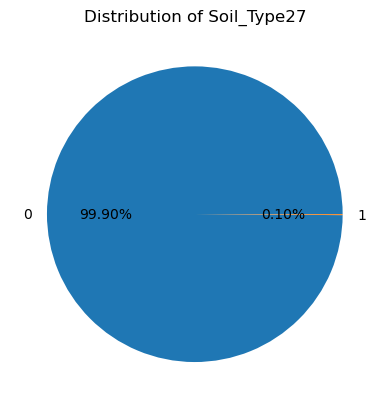

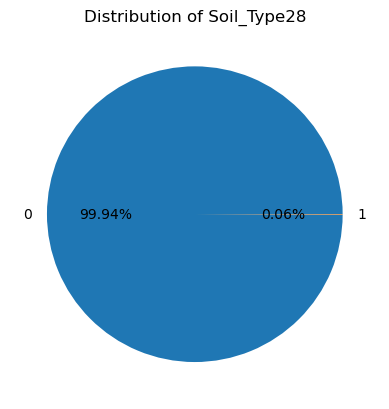

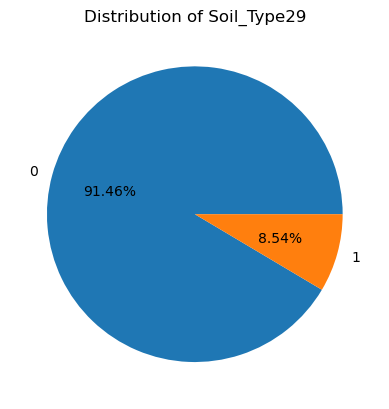

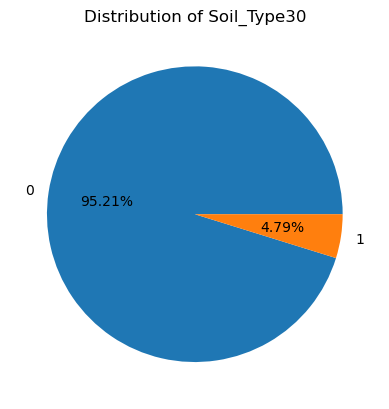

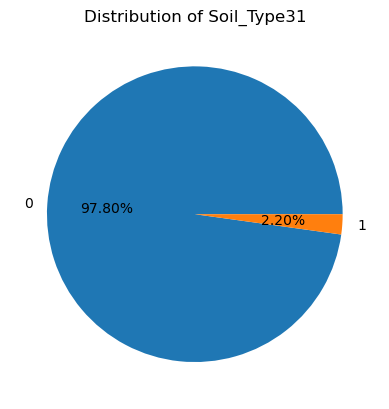

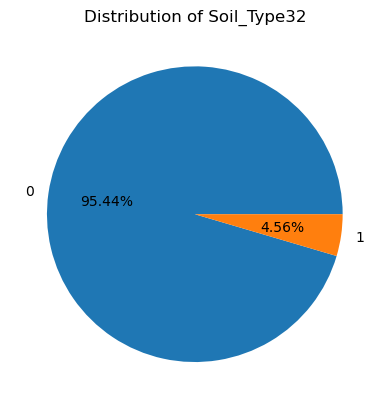

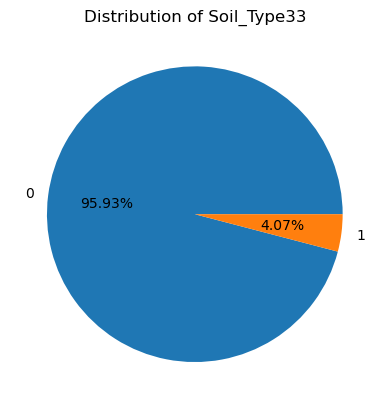

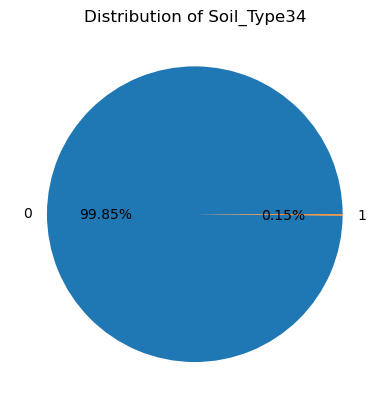

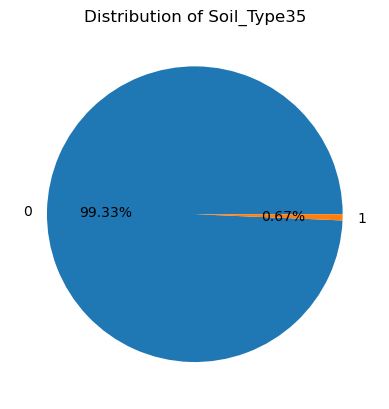

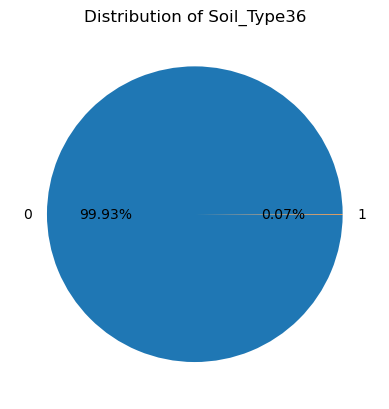

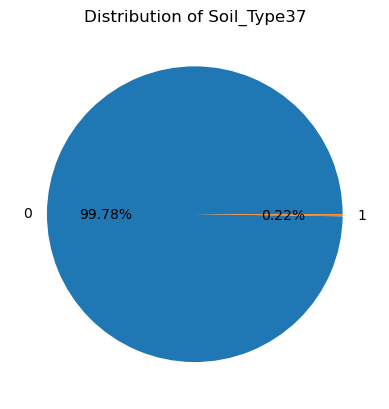

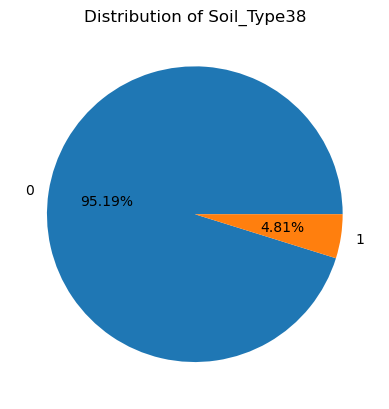

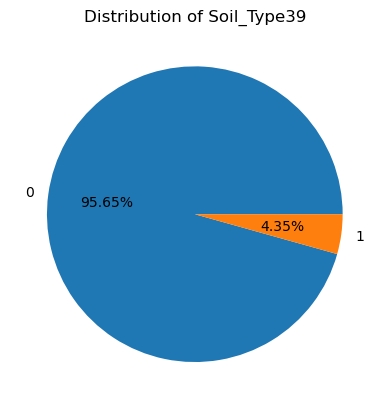

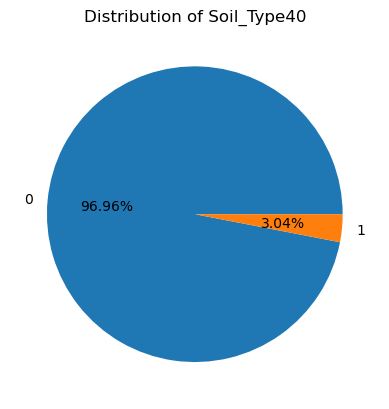

In [52]:
#visualize bin cols
for col in bin_cols.columns:
    # Count the values in the binary column
    value_counts = train_data[col].value_counts()

    # Create a pie chart
    plt.pie(value_counts, labels=value_counts.index, autopct='%1.2f%%')
    plt.title(f'Distribution of {col}')
    plt.show()

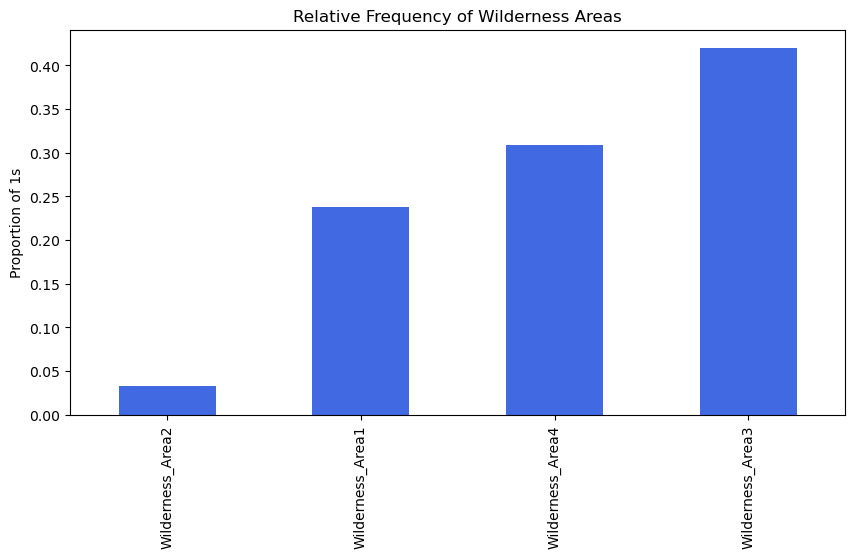

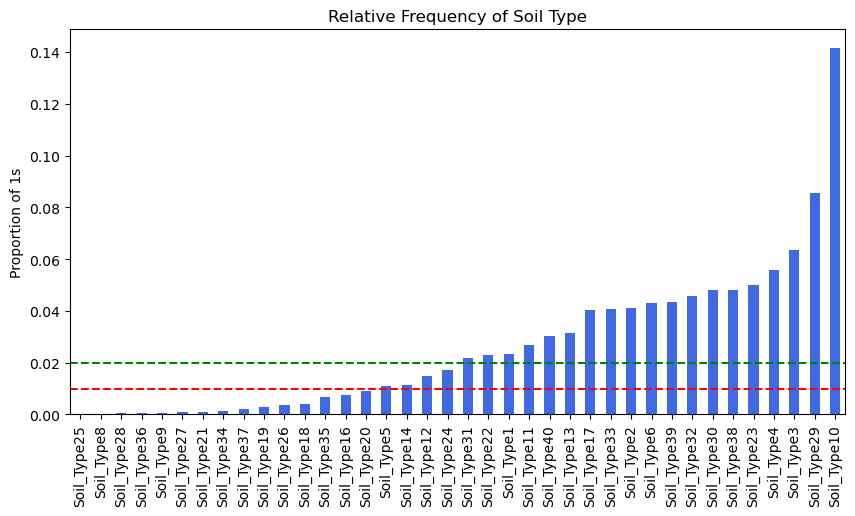

In [551]:
def plot_bin_freq(bin_freq, name):
    plt.figure(figsize=(10, 5))
    bin_freq.sort_values().plot(kind="bar", color="royalblue", alpha=1)
    if name == 'Soil Type':
        plt.axhline(0.01, color="red", linestyle="--", label="1% line")
        plt.axhline(0.02, color="green", linestyle="--", label="1% line") 
    plt.ylabel("Proportion of 1s")
    plt.title(f"Relative Frequency of {name}")
    plt.xticks(rotation=90)
    plt.show()

#creating one column from the one-hot encoded columns
wild_cols = [col for col in train_data.columns if "Wilderness_Area" in col]
soil_cols = [col for col in train_data.columns if "Soil_Type" in col]

# Compute relative frequencies - for binary col mean is the frequency
wild_freq = train_data[wild_cols].mean()  
soil_freq = train_data[soil_cols].mean()  

plot_bin_freq(wild_freq,'Wilderness Areas')
plot_bin_freq(soil_freq,'Soil Type')

### Visualizing target distribution conditional to binary distribution

In [234]:
def cond_target_dist(cols):
    data = train_data[train_data[cols] == 1]
    for col in cols:
        plt.figure(figsize=(6, 4))
        sns.countplot(data=data, x=col, hue=target["Cover_Type"])
        plt.title(f"Target Distribution by {col}")
        plt.xlabel(col)
        plt.ylabel("Count")
        plt.legend(title="Cover_Type")
        plt.show()

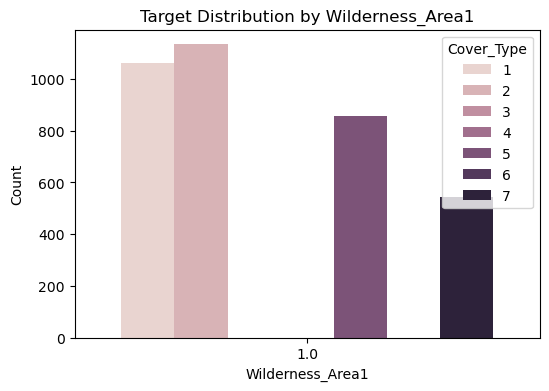

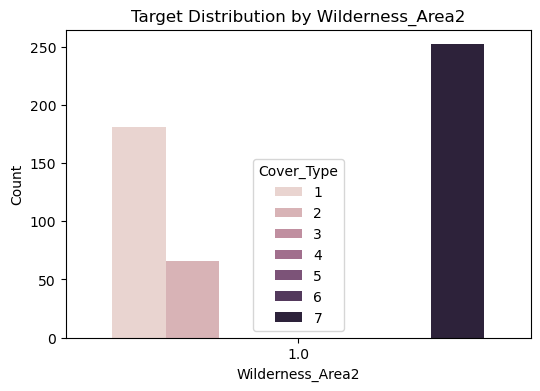

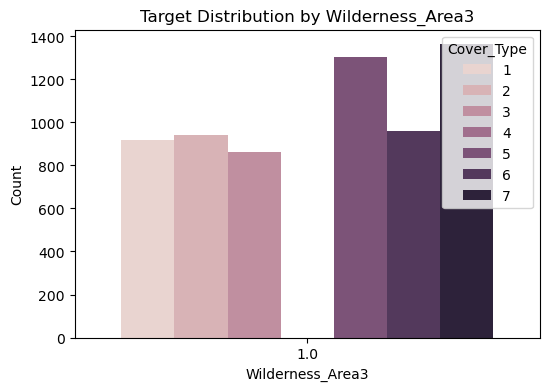

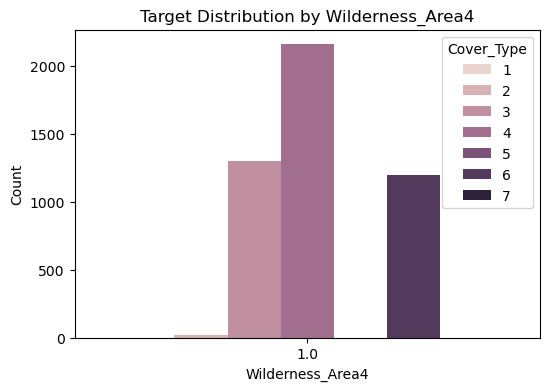

In [240]:
cond_target_dist(wild_cols)

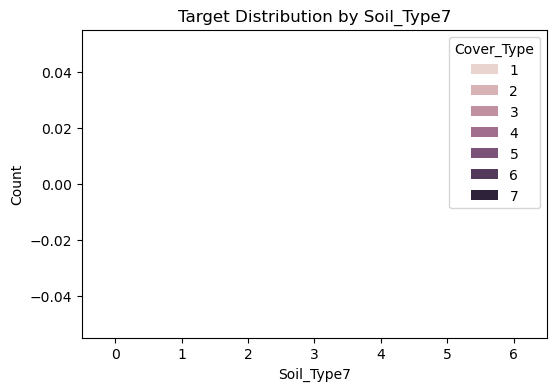

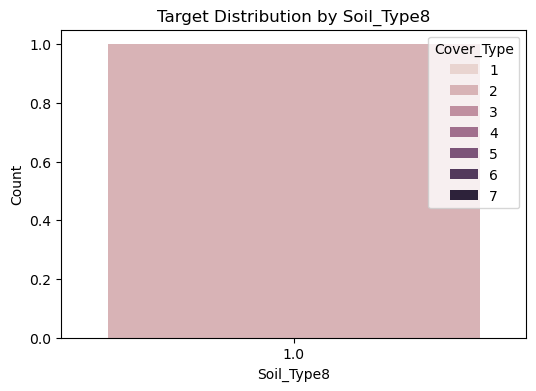

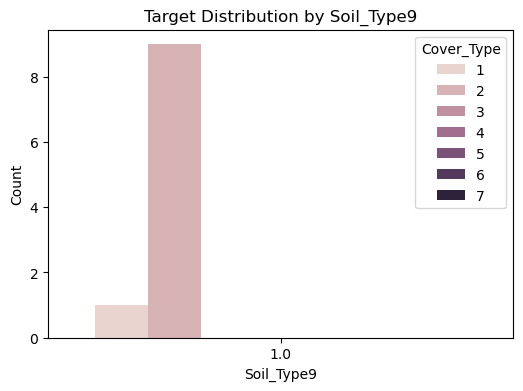

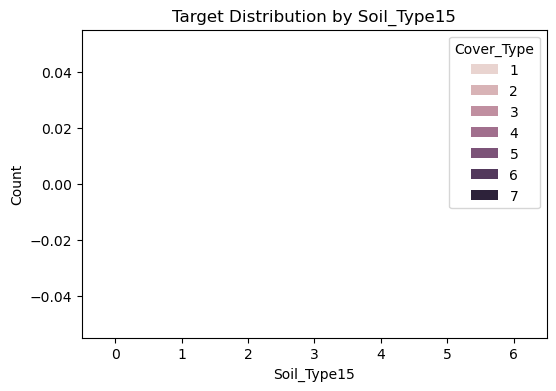

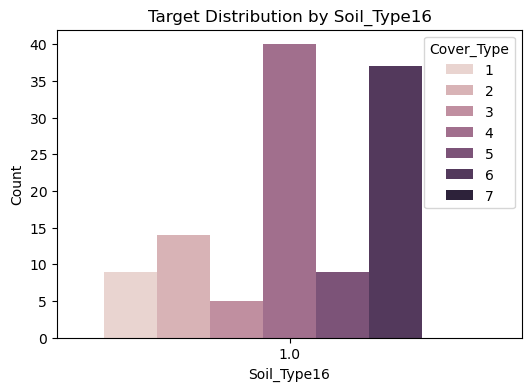

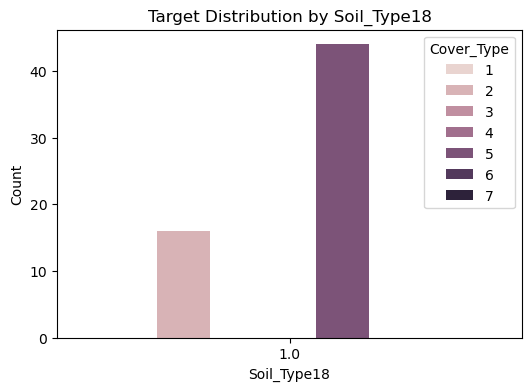

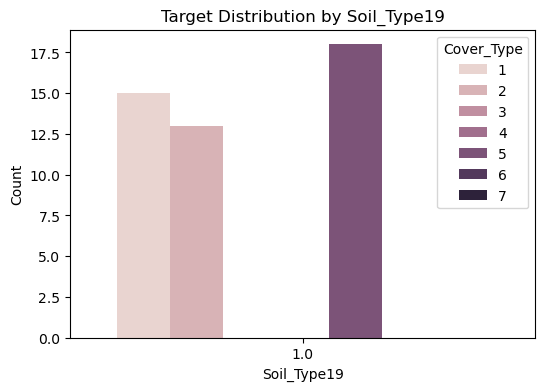

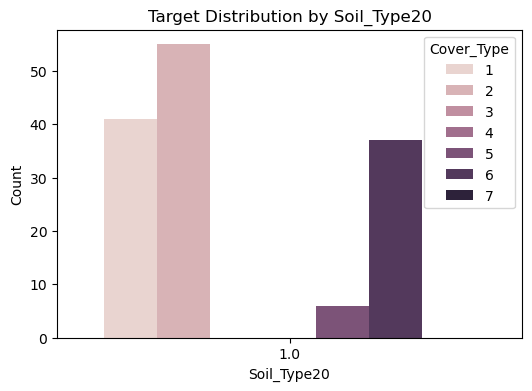

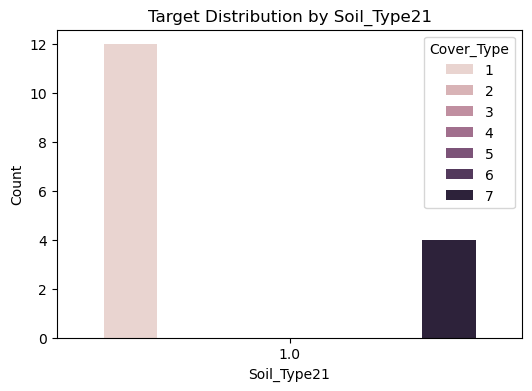

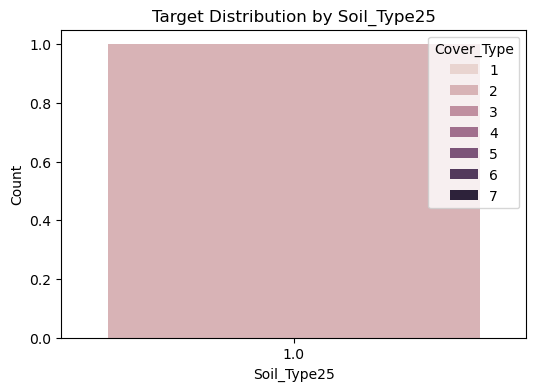

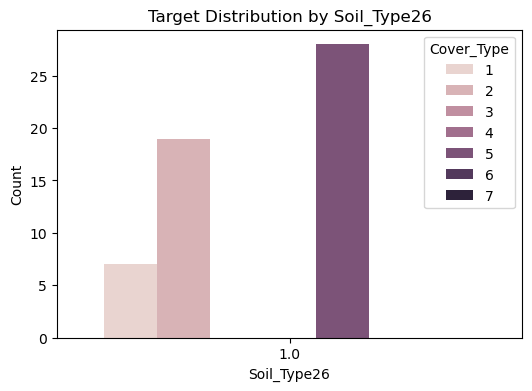

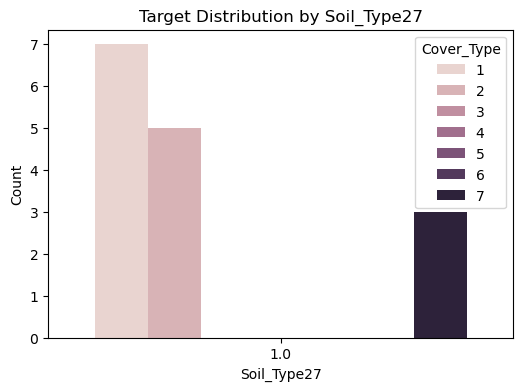

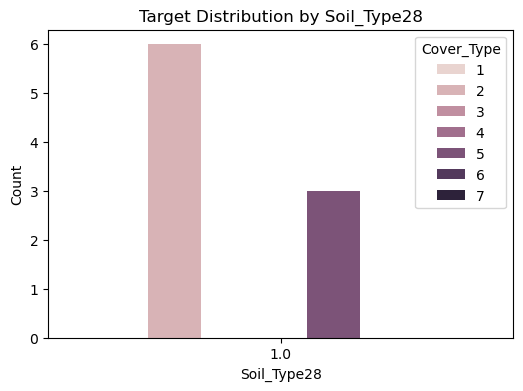

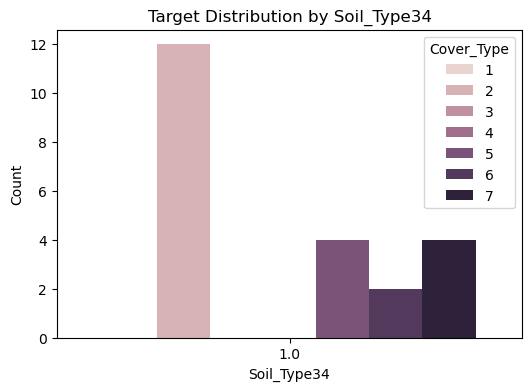

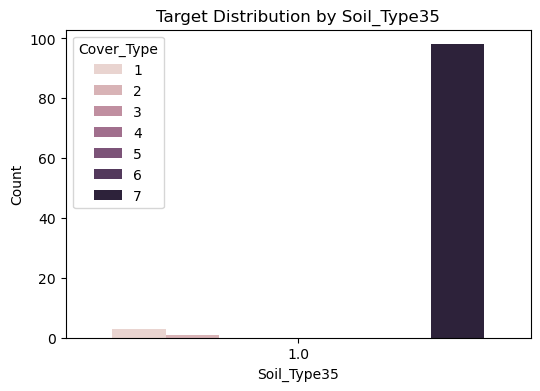

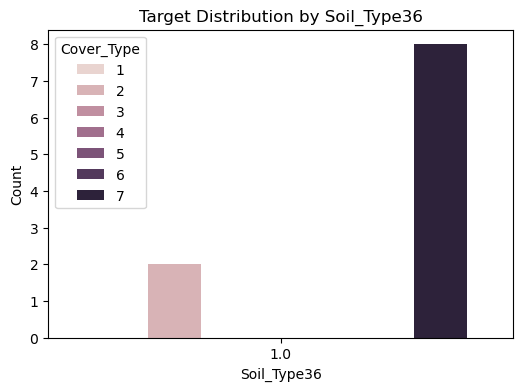

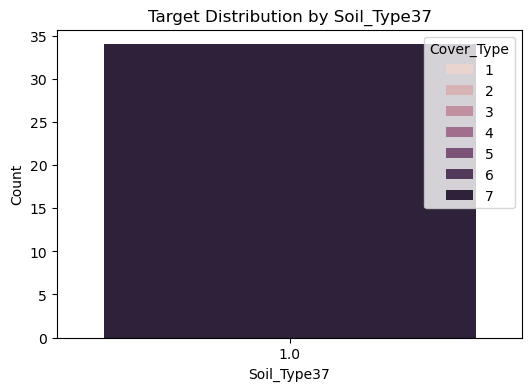

In [368]:
#visualize distribution for soil columns below 1%
soil_cols_to_drop = soil_freq[soil_freq < 0.01].index.tolist()

low_ft_data = train_data[train_data[soil_cols_to_drop] == 1]

cond_target_dist(soil_cols_to_drop)

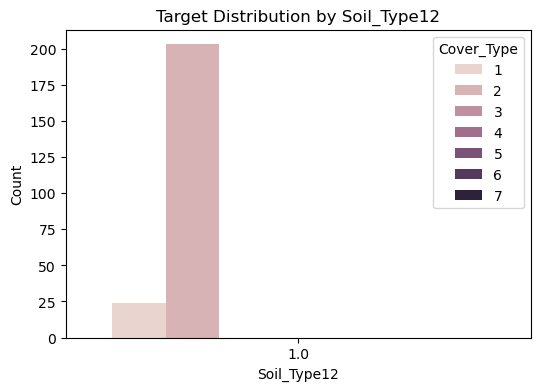

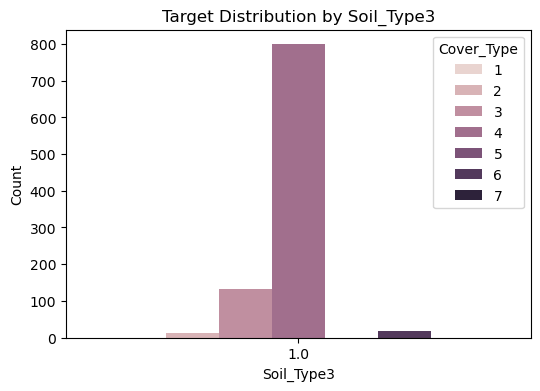

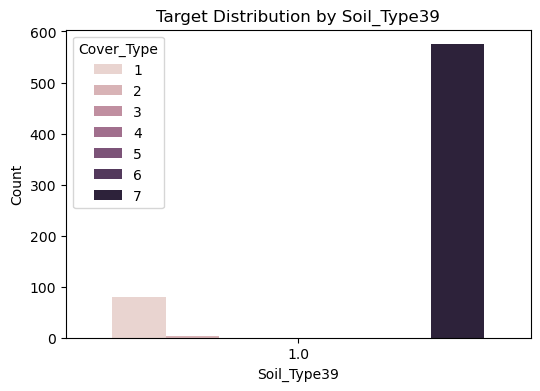

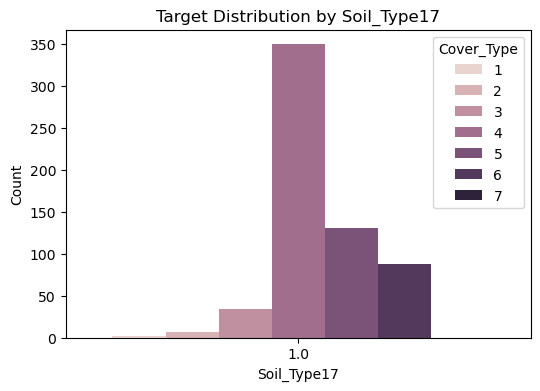

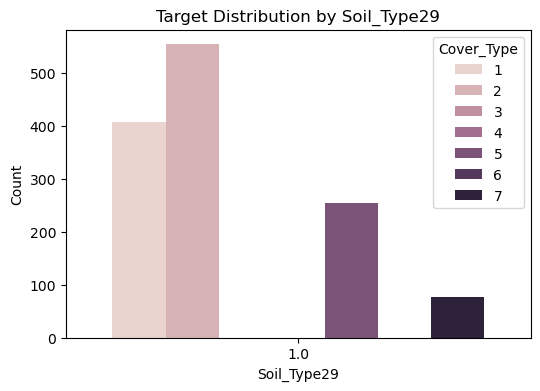

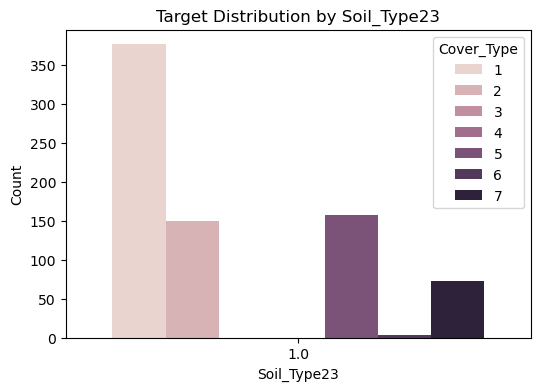

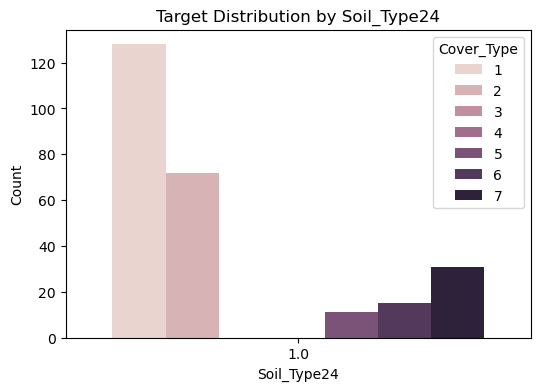

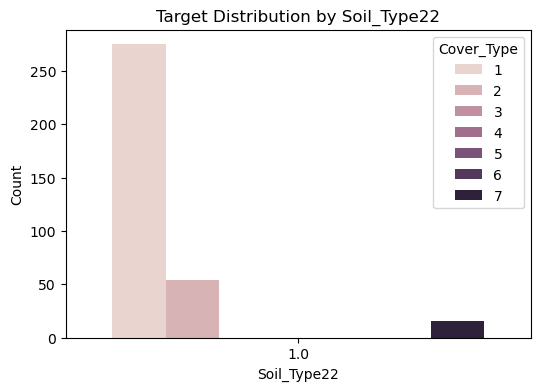

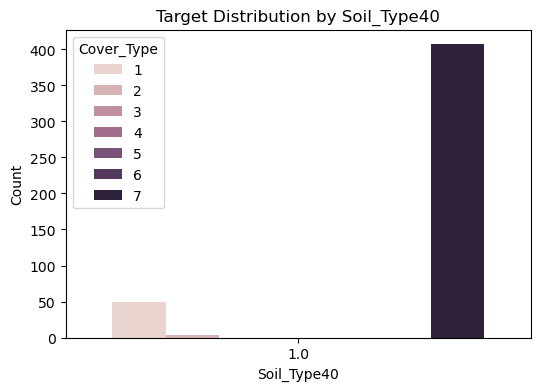

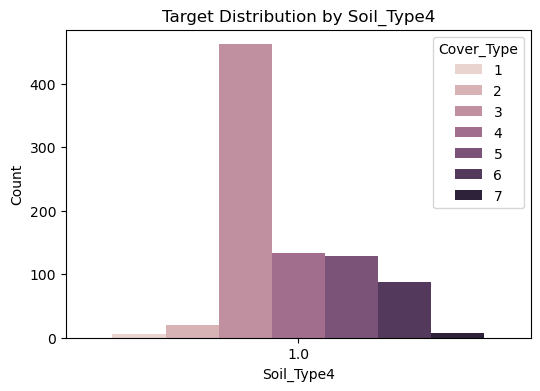

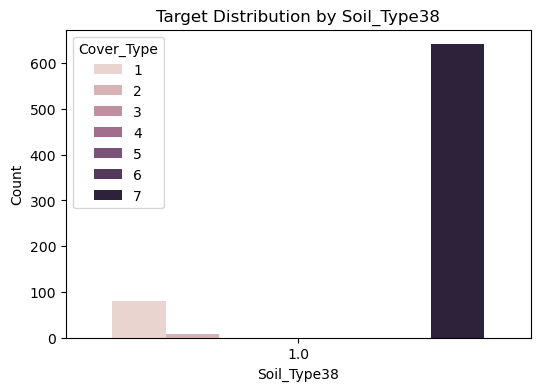

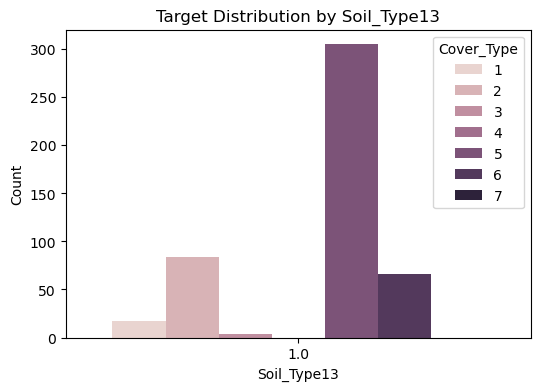

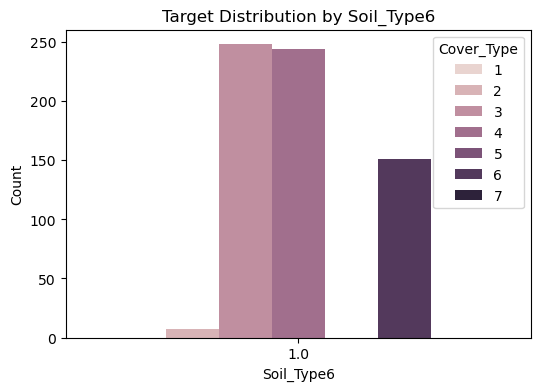

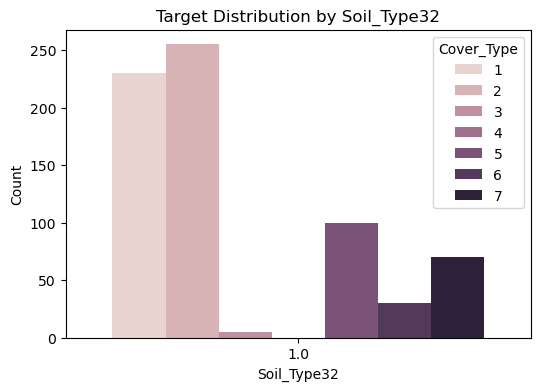

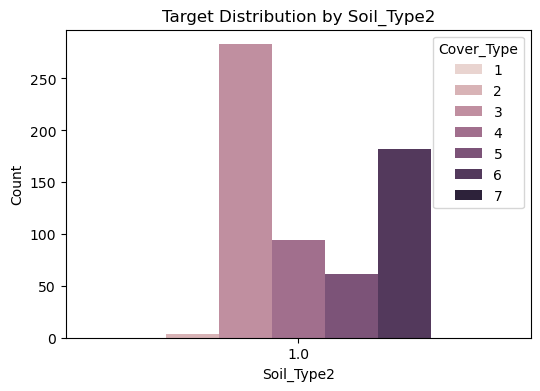

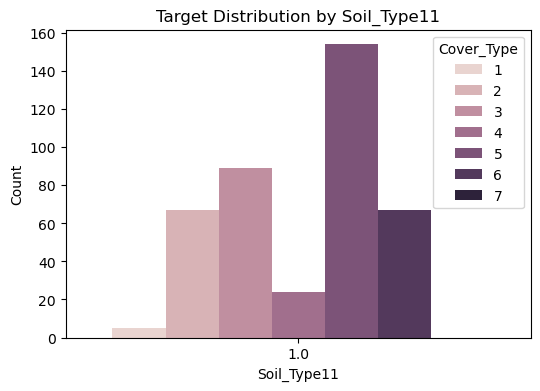

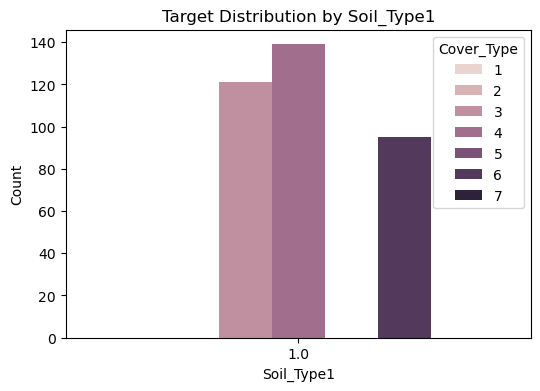

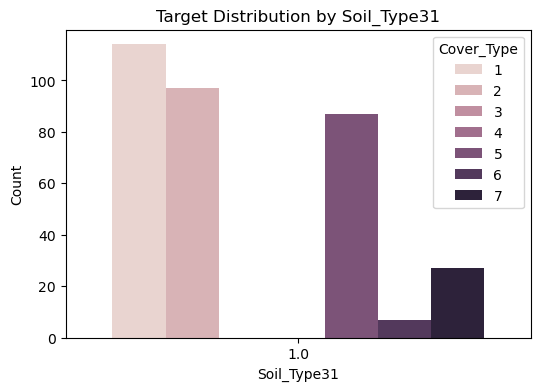

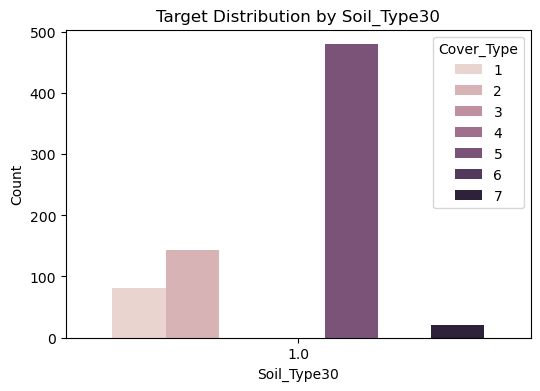

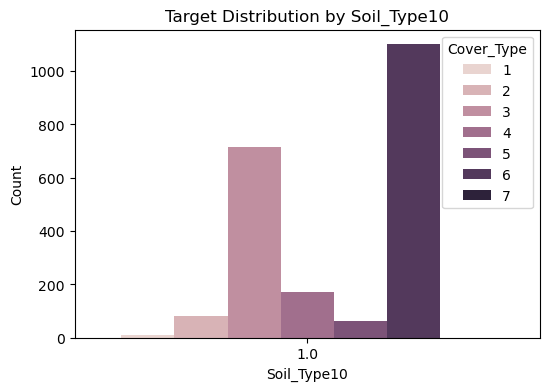

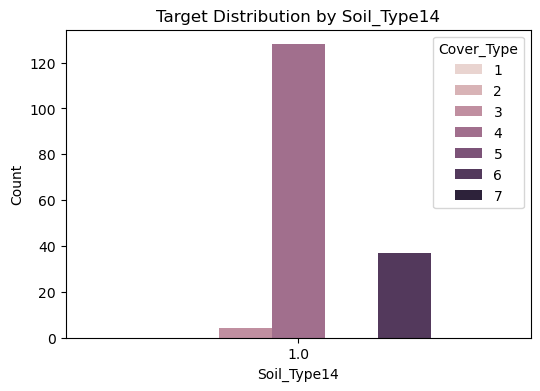

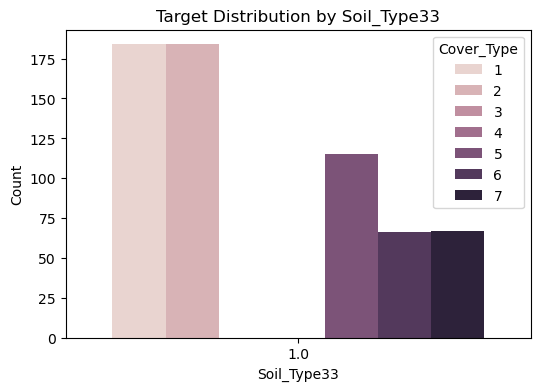

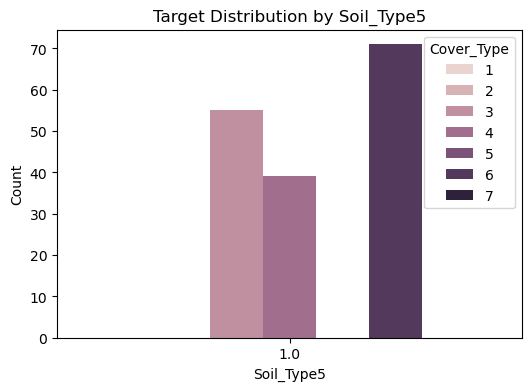

In [238]:
#target distribution for other soil types
soil_cols_to_keep = list(set(soil_cols) - set(soil_cols_to_drop))

cond_target_dist(soil_cols_to_keep)
soil_cols_to_keep.append('Soil_Type35')#keeping it for imbalanced target dist.

**Dropping binary cols**

**Visualizing Numerical Columns**

In [113]:
def plot_dist(x,bins = 20):
    plt.figure(figsize=(8, 5))
    sns.histplot(train_data[x], bins=bins, kde=True, color="royalblue", alpha=0.6)
    
    # Labels
    plt.xlabel(x)
    plt.ylabel("Frequency")
    plt.title(f"Distribution of {x}")

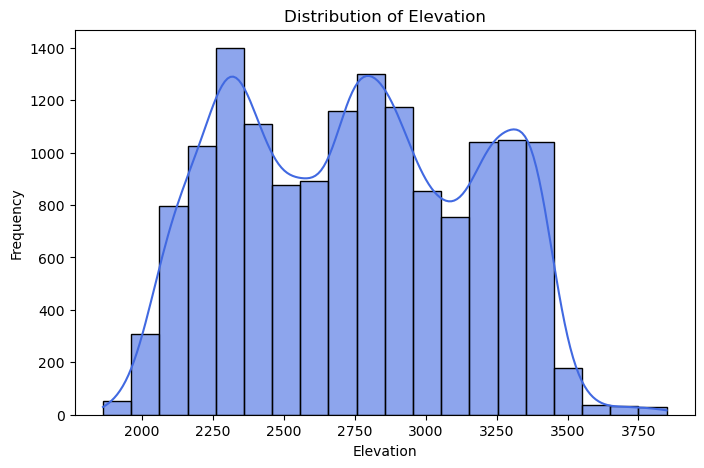

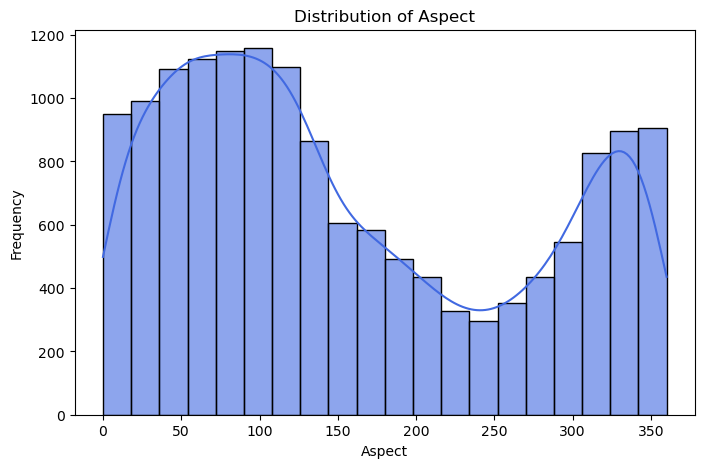

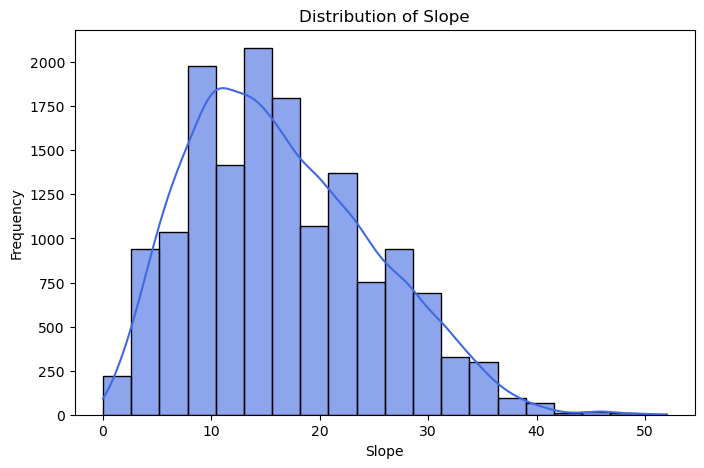

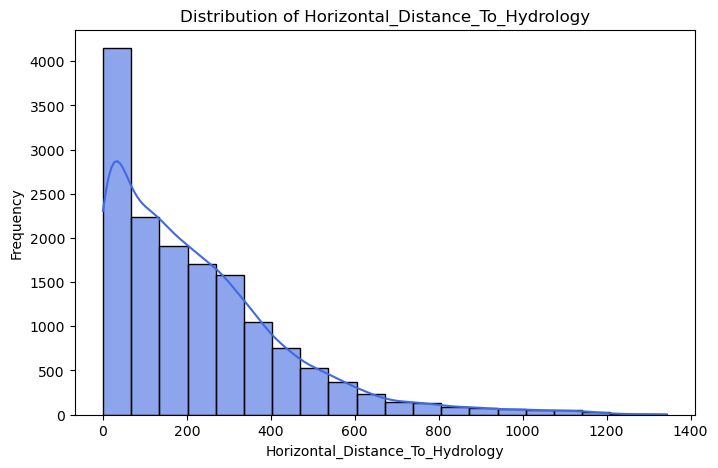

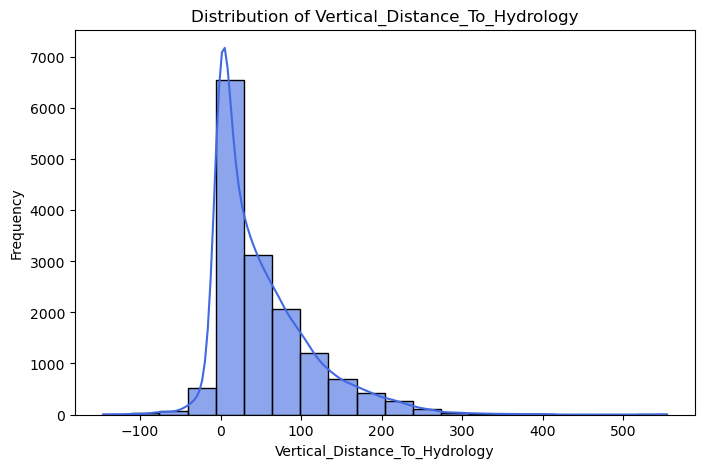

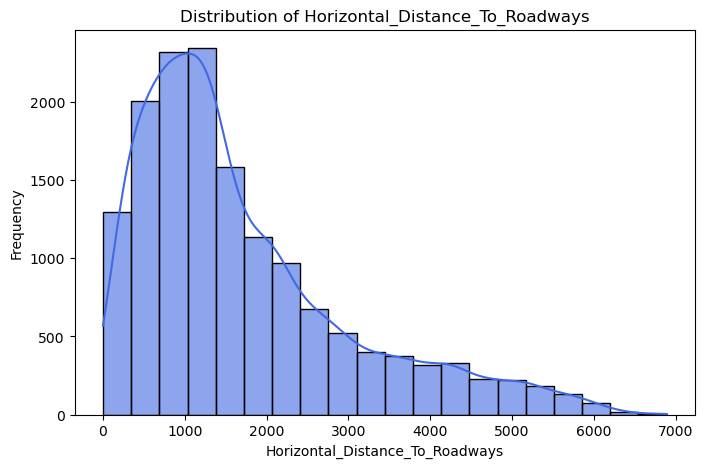

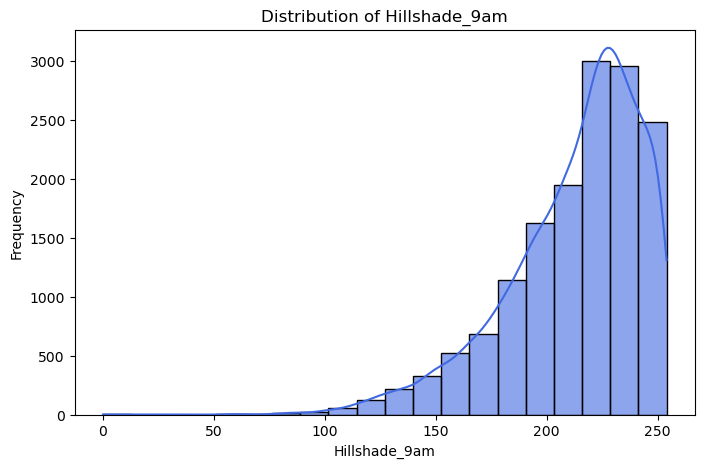

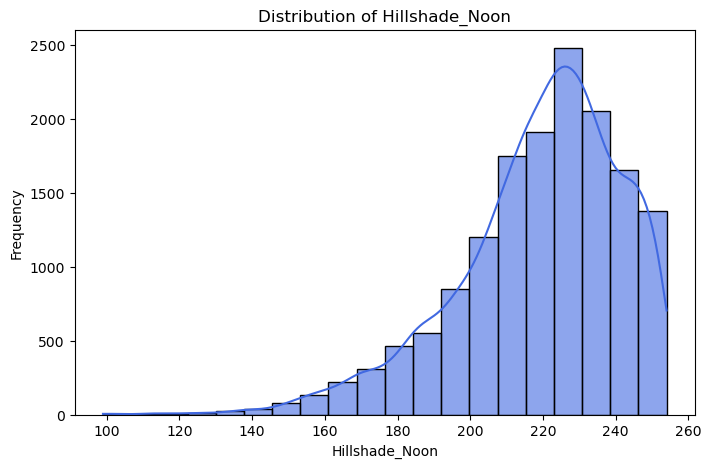

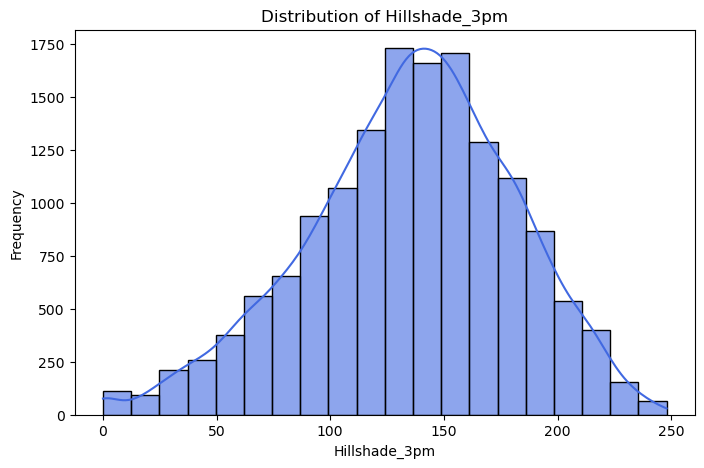

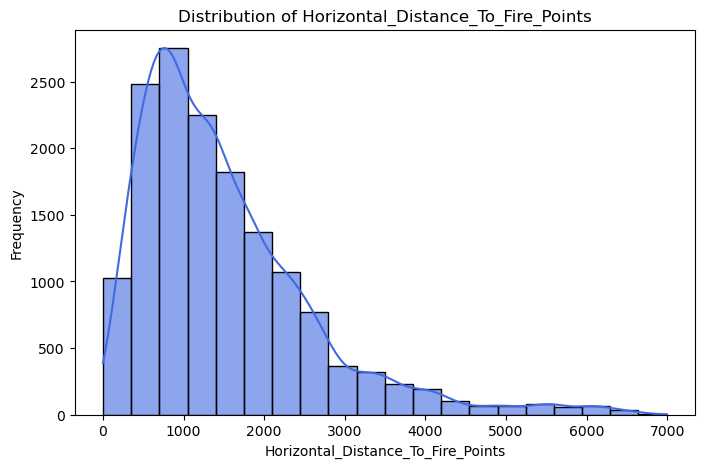

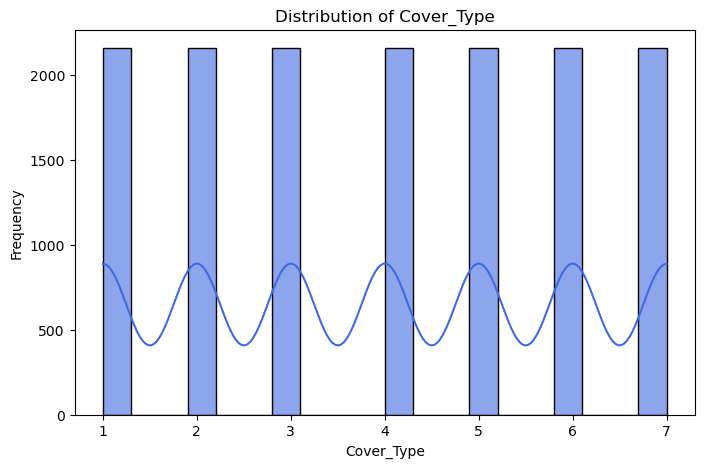

In [635]:
for col in num_cols.columns:
    plot_dist(col)

**Outlier Detection**

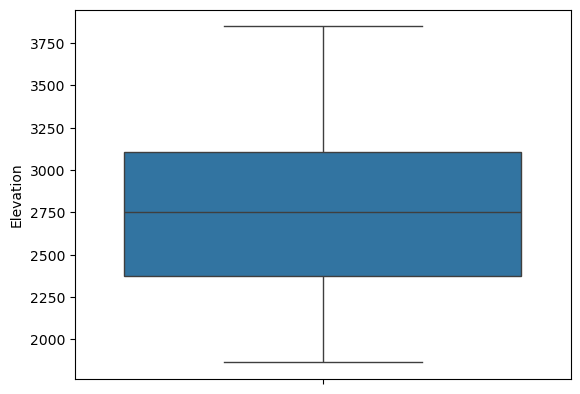

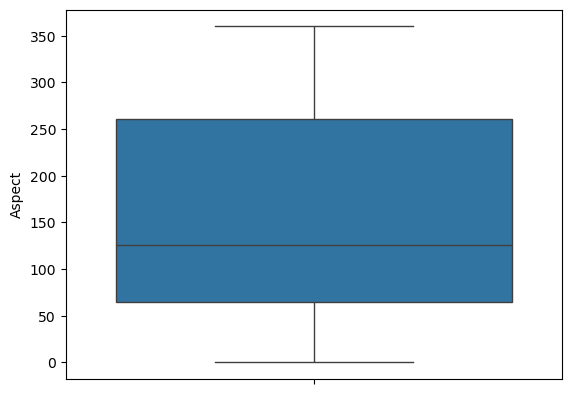

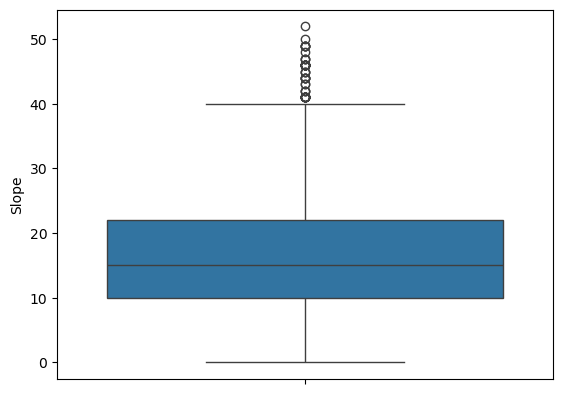

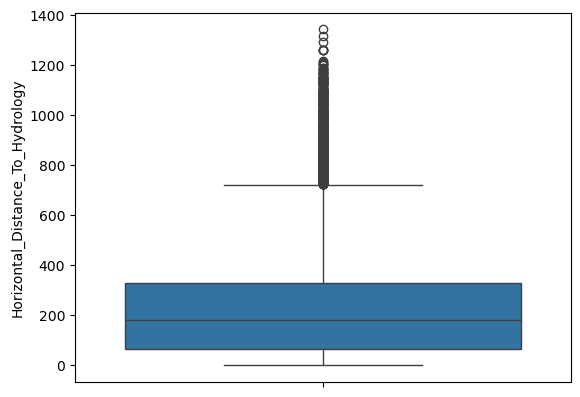

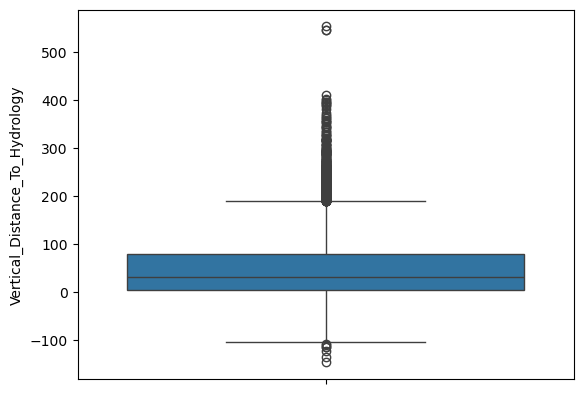

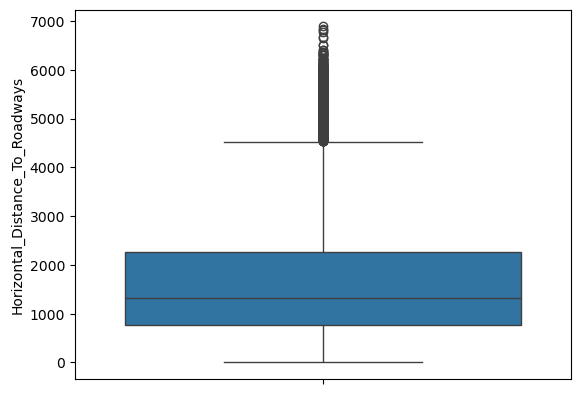

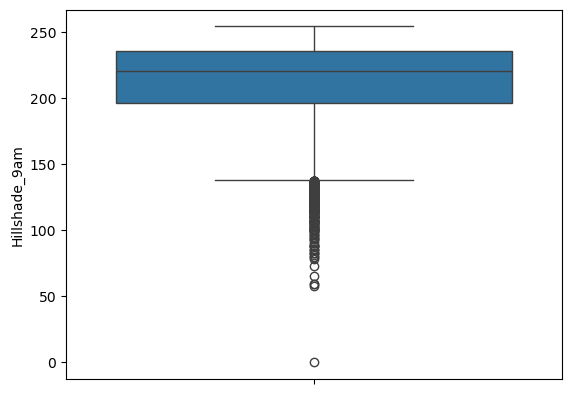

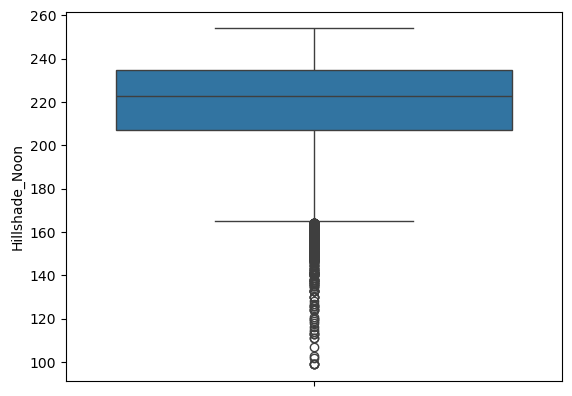

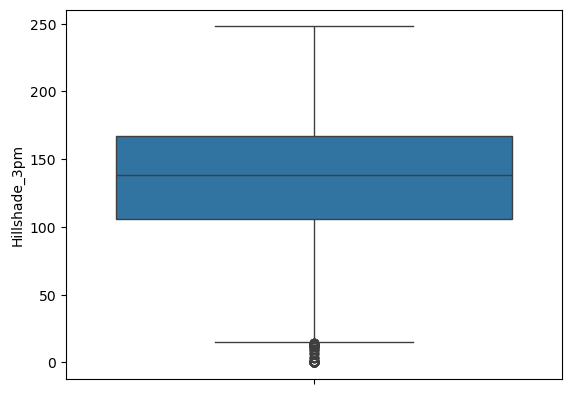

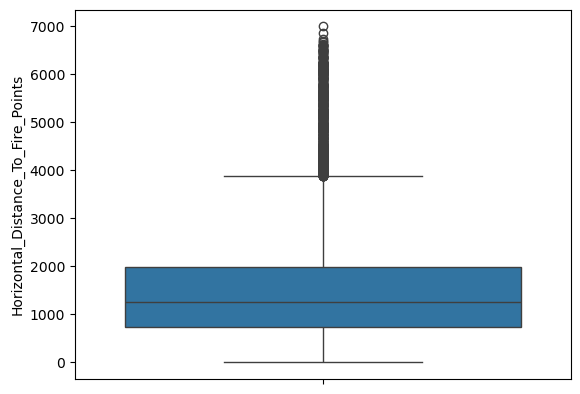

In [57]:
for col in num_cols.columns:
    sns.boxplot(train_data[col])
    plt.show()

In [974]:
# Create a single categorical soil type column
train_data_cleaned = train_data.copy()
test_data_cleaned = test_data.copy()

train_data_cleaned = train_data_cleaned.drop(columns=['Id','Cover_Type'])

#merge soil type columns
train_data_cleaned['Soil_Type'] = (
    train_data_cleaned[soil_cols]
    .idxmax(axis=1)  # Get the column name with the max value
    .str.extract(r'(\d+)')  # Extract the numeric part
    .astype(float)  # Convert to numeric type
    .where(train_data_cleaned[soil_cols].sum(axis=1) > 0, -1)  # Replace with -1 if all are 0
)
test_data_cleaned['Soil_Type'] = (
    test_data_cleaned[soil_cols]
    .idxmax(axis=1)  # Get the column name with the max value
    .str.extract(r'(\d+)')  # Extract the numeric part
    .astype(float)  # Convert to numeric type
    .where(test_data_cleaned[soil_cols].sum(axis=1) > 0, -1)  # Replace with -1 if all are 0
)


In [975]:
from sklearn.mixture import GaussianMixture

#distance to hydrology: from horizontal and vertical distance overall distance could be created
train_data_cleaned['Distance_To_Hydrology']= np.sqrt(train_data_cleaned['Horizontal_Distance_To_Hydrology']**2+train_data_cleaned['Vertical_Distance_To_Hydrology']**2)
train_data_cleaned['Average_Hillshade']=(train_data_cleaned['Hillshade_9am']+train_data_cleaned['Hillshade_Noon']+train_data_cleaned['Hillshade_3pm'])/3
test_data_cleaned['Distance_To_Hydrology']= np.sqrt(test_data_cleaned['Horizontal_Distance_To_Hydrology']**2+test_data_cleaned['Vertical_Distance_To_Hydrology']**2)
test_data_cleaned['Average_Hillshade']=(test_data_cleaned['Hillshade_9am']+test_data_cleaned['Hillshade_Noon']+test_data_cleaned['Hillshade_3pm'])/3


# Drop wilderness area
train_data_cleaned = train_data_cleaned.drop(columns=soil_cols+['Wilderness_Area2'])
test_data_cleaned = test_data_cleaned.drop(columns=soil_cols+['Wilderness_Area2','Soil_Type15','Soil_Type7']) #these 2 soil types were not present in train

gmm = GaussianMixture(n_components=3, random_state=42)
train_data_cleaned["Elevation_Cluster"] = gmm.fit_predict(train_data_cleaned[["Elevation"]])
test_data_cleaned["Elevation_Cluster"] = gmm.fit_predict(test_data_cleaned[["Elevation"]])


fe_cols_to_drop = ['Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology','Hillshade_9am','Hillshade_Noon','Hillshade_3pm',"Elevation"]
added_cols =['Distance_To_Hydrology','Average_Hillshade',"Elevation_Cluster"]

In [896]:
train_data_fe = train_data_cleaned.drop(columns = fe_cols_to_drop)
test_data_fe = test_data_cleaned.drop(columns = fe_cols_to_drop)
                                     
train_data_og = train_data_cleaned.drop(columns=added_cols)
test_data_og = test_data_cleaned.drop(columns=added_cols)

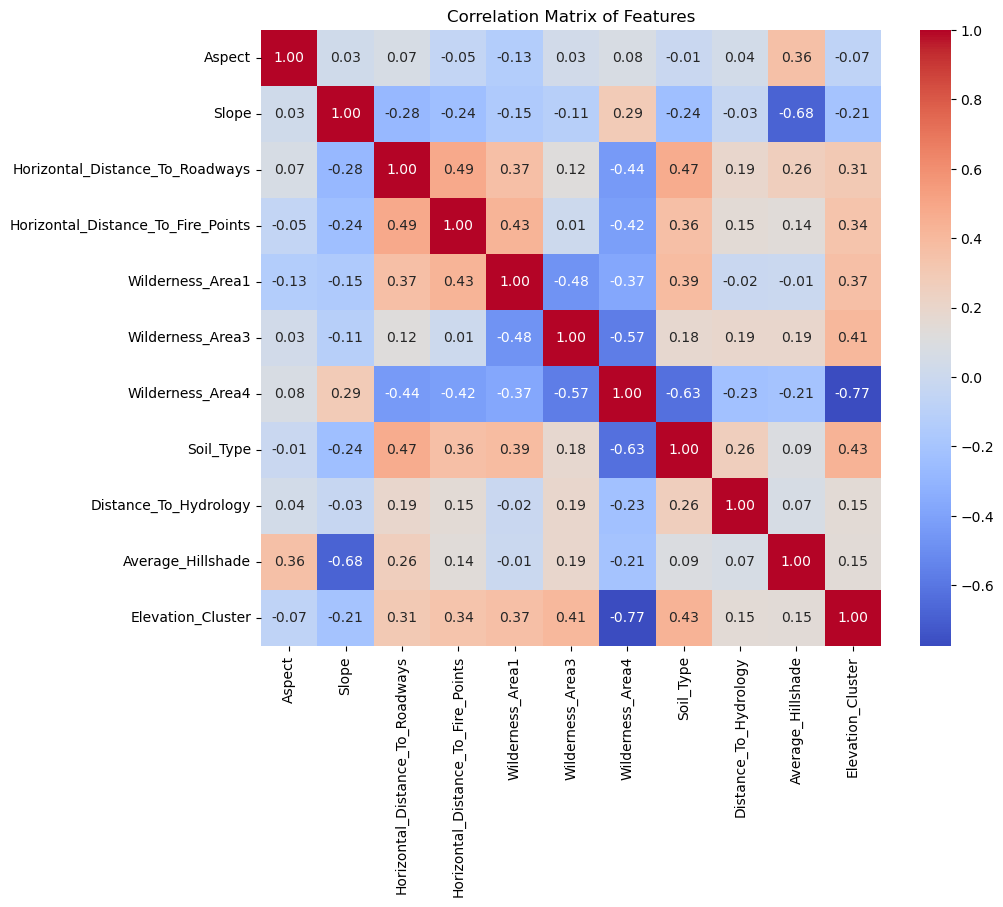

In [878]:
plt.figure(figsize=(10, 8))
sns.heatmap(train_data_fe.corr(), cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Correlation Matrix of Features")
plt.show()

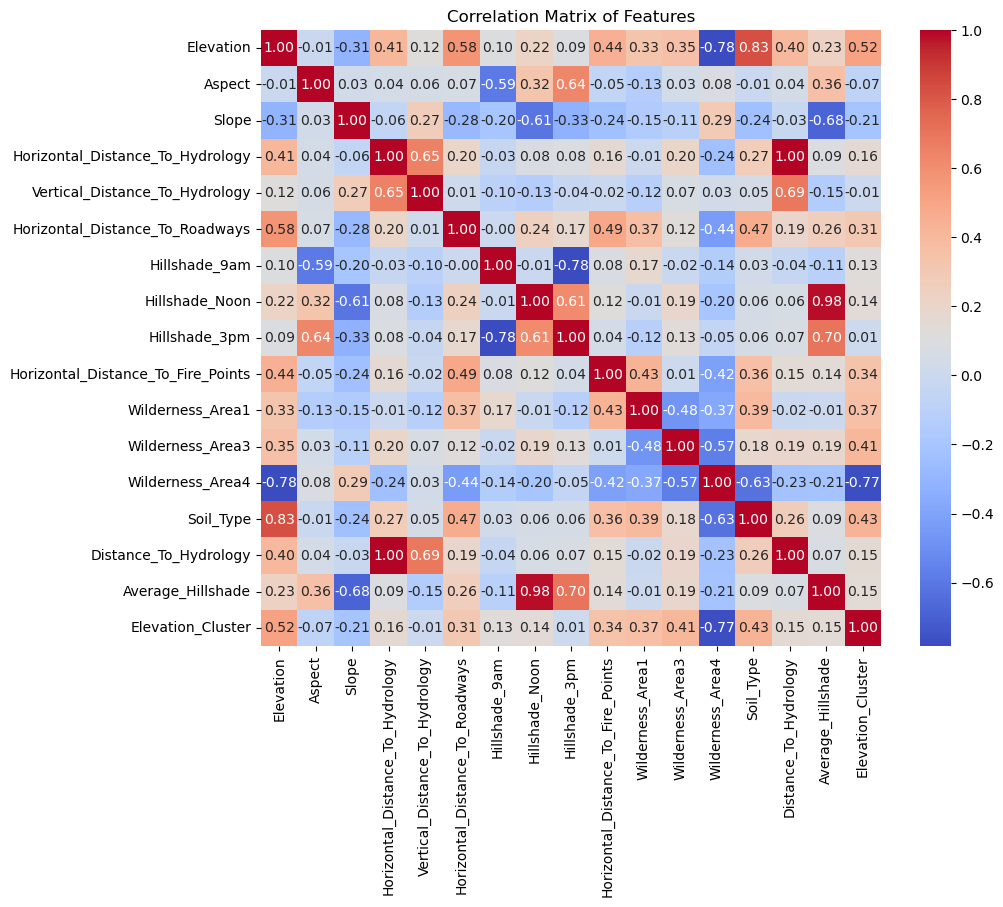

In [978]:
plt.figure(figsize=(10, 8))
sns.heatmap(train_data_cleaned.corr(), cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Correlation Matrix of Features")
plt.show()

Elevation and Soil_Types are highly correlated. So probably the composition of soil is determined by altitude. This case it is worth considering to drop soil types entirely maybe?

Elevation has a tri-modal distribution which can mean different categories.
Creating 3 clusters from elevation and adding it to the data

## 3. Modeling

In [884]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import balanced_accuracy_score, accuracy_score, roc_auc_score,auc, precision_recall_curve, f1_score, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
import optuna
import optuna.visualization as vis


In [1161]:
def objective(trial, X_train, y_train):
    # Define the hyperparameter search space
    n_estimators = trial.suggest_int("n_estimators", 100, 300, step=25)
    max_depth = trial.suggest_int("max_depth", 2, 20)
    min_samples_split = trial.suggest_int("min_samples_split", 10, 30)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 5, 20)

    # Initialize RFC with suggested hyperparameters
    rfc = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42,
        n_jobs=-1
    )

    # Evaluate using 5-fold cross-validation
    accuracy = cross_val_score(rfc, X_train, y_train, cv=5, scoring="accuracy").mean()

    if trial.number % 5 == 0:
        print(f"Trial {trial.number}: Accuracy = {accuracy:.4f}, Params = {trial.params}")

    return accuracy



In [1144]:
def run_viusalize_optuna_rfc(X_train,  X_test, y_train, y_test):
    # Run Optuna optimization
    study = optuna.create_study(direction="maximize")
    study.optimize(lambda trial: objective(trial, X_train, y_train), n_trials=50, n_jobs=-1)
    
    # Best parameters and score
    print("Best parameters:", study.best_params)
    print("Best accuracy:", study.best_value)
    
        # Visualization of Optuna study
    vis.plot_optimization_history(study).show()
    vis.plot_parallel_coordinate(study).show()
    vis.plot_slice(study).show()

    best_rfc = RandomForestClassifier(**study.best_params, random_state=42, n_jobs=-1)
    best_rfc.fit(X_train, y_train)

    # Evaluate accuracy on training and test data
    train_accuracy = best_rfc.score(X_train, y_train)
    test_accuracy = best_rfc.score(X_test, y_test)

    print('Train Accuracy:', train_accuracy)
    print('Test Accuracy:', test_accuracy)
    return best_rfc

In [930]:
def save_output(test_df, y_pred):
    results = pd.DataFrame({
        'Id': test_df['Id'],  # Match IDs from the test set
        'Cover_Type': y_pred  # Add predicted labels
    })
    
    results.to_csv('data/results.csv',index = False)

### Running saturated model to check feature importance

In [934]:
#run saturated model
X_train, X_test, y_train, y_test = train_test_split(train_data_cleaned, target, test_size=0.2, random_state=42) 

best_rfc_sa  = run_viusalize_optuna_rfc(X_train, X_test, y_train, y_test) 


In [967]:
importances = best_rfc_sa.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X_train3.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

feature_importance_df

,Feature,Importance
0,Elevation,0.248612
13,Soil_Type,0.169398
16,Elevation_Cluster,0.108179
5,Horizontal_Distance_To_Roadways,0.071763
9,Horizontal_Distance_To_Fire_Points,0.051405
6,Hillshade_9am,0.045661
14,Distance_To_Hydrology,0.039752
3,Horizontal_Distance_To_Hydrology,0.038775
12,Wilderness_Area4,0.035620
1,Aspect,0.031270


In [1163]:

train_data_fe = train_data_cleaned.drop(columns = ['Average_Hillshade','Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology','Slope'],axis=1)
test_data_fe = test_data_cleaned.drop(columns = ['Average_Hillshade','Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology','Slope'],axis=1)

[I 2025-03-26 19:55:59,259] A new study created in memory with name: no-name-0d0a3383-fbc9-4705-a37b-a9be37ac7844
[I 2025-03-26 19:56:32,703] Trial 0 finished with value: 0.8020013050949952 and parameters: {'n_estimators': 150, 'max_depth': 19, 'min_samples_split': 12, 'min_samples_leaf': 11}. Best is trial 0 with value: 0.8020013050949952.


Trial 0: Accuracy = 0.8020, Params = {'n_estimators': 150, 'max_depth': 19, 'min_samples_split': 12, 'min_samples_leaf': 11}


[I 2025-03-26 19:56:35,898] Trial 3 finished with value: 0.7063493213164378 and parameters: {'n_estimators': 175, 'max_depth': 5, 'min_samples_split': 23, 'min_samples_leaf': 20}. Best is trial 0 with value: 0.8020013050949952.
[I 2025-03-26 19:56:36,074] Trial 2 finished with value: 0.7555396841123475 and parameters: {'n_estimators': 175, 'max_depth': 8, 'min_samples_split': 25, 'min_samples_leaf': 18}. Best is trial 0 with value: 0.8020013050949952.
[I 2025-03-26 19:56:43,591] Trial 7 finished with value: 0.6885750549199007 and parameters: {'n_estimators': 225, 'max_depth': 4, 'min_samples_split': 24, 'min_samples_leaf': 10}. Best is trial 0 with value: 0.8020013050949952.
[I 2025-03-26 19:56:44,967] Trial 4 finished with value: 0.8028278880351488 and parameters: {'n_estimators': 225, 'max_depth': 13, 'min_samples_split': 23, 'min_samples_leaf': 9}. Best is trial 4 with value: 0.8028278880351488.
[I 2025-03-26 19:56:49,393] Trial 1 finished with value: 0.7892697959337066 and paramete

Trial 5: Accuracy = 0.8092, Params = {'n_estimators': 275, 'max_depth': 14, 'min_samples_split': 19, 'min_samples_leaf': 8}


[I 2025-03-26 19:57:02,735] Trial 10 finished with value: 0.7924942688564021 and parameters: {'n_estimators': 125, 'max_depth': 18, 'min_samples_split': 27, 'min_samples_leaf': 15}. Best is trial 5 with value: 0.8091938476045357.


Trial 10: Accuracy = 0.7925, Params = {'n_estimators': 125, 'max_depth': 18, 'min_samples_split': 27, 'min_samples_leaf': 15}


[I 2025-03-26 19:57:05,415] Trial 8 finished with value: 0.6879962692048828 and parameters: {'n_estimators': 175, 'max_depth': 4, 'min_samples_split': 19, 'min_samples_leaf': 18}. Best is trial 5 with value: 0.8091938476045357.
[I 2025-03-26 19:57:13,115] Trial 12 finished with value: 0.6555897013655667 and parameters: {'n_estimators': 150, 'max_depth': 3, 'min_samples_split': 30, 'min_samples_leaf': 8}. Best is trial 5 with value: 0.8091938476045357.
[I 2025-03-26 19:57:20,229] Trial 11 finished with value: 0.687913419588041 and parameters: {'n_estimators': 200, 'max_depth': 4, 'min_samples_split': 25, 'min_samples_leaf': 10}. Best is trial 5 with value: 0.8091938476045357.
[I 2025-03-26 19:57:30,972] Trial 9 finished with value: 0.6896498450626753 and parameters: {'n_estimators': 300, 'max_depth': 4, 'min_samples_split': 15, 'min_samples_leaf': 16}. Best is trial 5 with value: 0.8091938476045357.
[I 2025-03-26 19:57:40,411] Trial 13 finished with value: 0.7976196023901687 and paramet

Trial 15: Accuracy = 0.6567, Params = {'n_estimators': 250, 'max_depth': 3, 'min_samples_split': 15, 'min_samples_leaf': 16}


[I 2025-03-26 19:57:56,219] Trial 14 finished with value: 0.797206310920092 and parameters: {'n_estimators': 300, 'max_depth': 11, 'min_samples_split': 23, 'min_samples_leaf': 9}. Best is trial 5 with value: 0.8091938476045357.
[I 2025-03-26 19:57:56,617] Trial 16 finished with value: 0.5941633555290589 and parameters: {'n_estimators': 275, 'max_depth': 2, 'min_samples_split': 13, 'min_samples_leaf': 19}. Best is trial 5 with value: 0.8091938476045357.
[I 2025-03-26 19:58:10,715] Trial 17 finished with value: 0.8172130755486011 and parameters: {'n_estimators': 275, 'max_depth': 14, 'min_samples_split': 14, 'min_samples_leaf': 6}. Best is trial 17 with value: 0.8172130755486011.
[I 2025-03-26 19:58:21,230] Trial 18 finished with value: 0.8170478546219837 and parameters: {'n_estimators': 300, 'max_depth': 14, 'min_samples_split': 15, 'min_samples_leaf': 5}. Best is trial 17 with value: 0.8172130755486011.
[I 2025-03-26 19:58:32,540] Trial 19 finished with value: 0.8183704078251036 and pa

Trial 20: Accuracy = 0.8149, Params = {'n_estimators': 250, 'max_depth': 13, 'min_samples_split': 16, 'min_samples_leaf': 5}


[I 2025-03-26 19:58:43,571] Trial 25 finished with value: 0.8225043133047943 and parameters: {'n_estimators': 100, 'max_depth': 15, 'min_samples_split': 10, 'min_samples_leaf': 5}. Best is trial 25 with value: 0.8225043133047943.


Trial 25: Accuracy = 0.8225, Params = {'n_estimators': 100, 'max_depth': 15, 'min_samples_split': 10, 'min_samples_leaf': 5}


[I 2025-03-26 19:59:00,972] Trial 21 finished with value: 0.8151464815390554 and parameters: {'n_estimators': 300, 'max_depth': 14, 'min_samples_split': 16, 'min_samples_leaf': 5}. Best is trial 25 with value: 0.8225043133047943.
[I 2025-03-26 19:59:01,772] Trial 22 finished with value: 0.8125006576722162 and parameters: {'n_estimators': 300, 'max_depth': 14, 'min_samples_split': 21, 'min_samples_leaf': 5}. Best is trial 25 with value: 0.8225043133047943.
[I 2025-03-26 19:59:01,954] Trial 24 finished with value: 0.8140714522427477 and parameters: {'n_estimators': 225, 'max_depth': 15, 'min_samples_split': 21, 'min_samples_leaf': 5}. Best is trial 25 with value: 0.8225043133047943.
[I 2025-03-26 19:59:02,221] Trial 23 finished with value: 0.8140714522427477 and parameters: {'n_estimators': 225, 'max_depth': 15, 'min_samples_split': 21, 'min_samples_leaf': 5}. Best is trial 25 with value: 0.8225043133047943.
[I 2025-03-26 19:59:06,025] Trial 27 finished with value: 0.8204372409881824 and

Trial 30: Accuracy = 0.8165, Params = {'n_estimators': 100, 'max_depth': 16, 'min_samples_split': 10, 'min_samples_leaf': 7}


[I 2025-03-26 19:59:30,065] Trial 31 finished with value: 0.8142370831468504 and parameters: {'n_estimators': 100, 'max_depth': 17, 'min_samples_split': 10, 'min_samples_leaf': 7}. Best is trial 25 with value: 0.8225043133047943.
[I 2025-03-26 19:59:30,354] Trial 32 finished with value: 0.8142370831468504 and parameters: {'n_estimators': 100, 'max_depth': 17, 'min_samples_split': 10, 'min_samples_leaf': 7}. Best is trial 25 with value: 0.8225043133047943.
[I 2025-03-26 19:59:30,508] Trial 33 finished with value: 0.8142370831468504 and parameters: {'n_estimators': 100, 'max_depth': 17, 'min_samples_split': 10, 'min_samples_leaf': 7}. Best is trial 25 with value: 0.8225043133047943.
[I 2025-03-26 19:59:33,922] Trial 34 finished with value: 0.8142370831468504 and parameters: {'n_estimators': 100, 'max_depth': 17, 'min_samples_split': 10, 'min_samples_leaf': 7}. Best is trial 25 with value: 0.8225043133047943.
[I 2025-03-26 19:59:37,317] Trial 26 finished with value: 0.8220081038882949 and

Trial 35: Accuracy = 0.8027, Params = {'n_estimators': 100, 'max_depth': 11, 'min_samples_split': 10, 'min_samples_leaf': 7}


[I 2025-03-26 19:59:51,080] Trial 28 finished with value: 0.8220081038882949 and parameters: {'n_estimators': 300, 'max_depth': 16, 'min_samples_split': 10, 'min_samples_leaf': 5}. Best is trial 25 with value: 0.8225043133047943.
[I 2025-03-26 20:00:02,161] Trial 36 finished with value: 0.803241145340435 and parameters: {'n_estimators': 125, 'max_depth': 11, 'min_samples_split': 12, 'min_samples_leaf': 7}. Best is trial 25 with value: 0.8225043133047943.
[I 2025-03-26 20:00:04,579] Trial 37 finished with value: 0.803241145340435 and parameters: {'n_estimators': 125, 'max_depth': 11, 'min_samples_split': 12, 'min_samples_leaf': 7}. Best is trial 25 with value: 0.8225043133047943.
[I 2025-03-26 20:00:04,974] Trial 38 finished with value: 0.803241145340435 and parameters: {'n_estimators': 125, 'max_depth': 11, 'min_samples_split': 12, 'min_samples_leaf': 7}. Best is trial 25 with value: 0.8225043133047943.
[I 2025-03-26 20:00:05,143] Trial 39 finished with value: 0.8061353130690574 and pa

Trial 40: Accuracy = 0.8061, Params = {'n_estimators': 125, 'max_depth': 11, 'min_samples_split': 12, 'min_samples_leaf': 6}


[I 2025-03-26 20:00:12,592] Trial 41 finished with value: 0.79464299502219 and parameters: {'n_estimators': 125, 'max_depth': 10, 'min_samples_split': 12, 'min_samples_leaf': 6}. Best is trial 25 with value: 0.8225043133047943.
[I 2025-03-26 20:00:16,851] Trial 42 finished with value: 0.8118394664826324 and parameters: {'n_estimators': 125, 'max_depth': 12, 'min_samples_split': 12, 'min_samples_leaf': 6}. Best is trial 25 with value: 0.8225043133047943.
[I 2025-03-26 20:00:25,390] Trial 43 finished with value: 0.8182878315265854 and parameters: {'n_estimators': 125, 'max_depth': 20, 'min_samples_split': 12, 'min_samples_leaf': 6}. Best is trial 25 with value: 0.8225043133047943.
[I 2025-03-26 20:00:32,381] Trial 44 finished with value: 0.8191148586090147 and parameters: {'n_estimators': 125, 'max_depth': 19, 'min_samples_split': 12, 'min_samples_leaf': 6}. Best is trial 25 with value: 0.8225043133047943.
[I 2025-03-26 20:00:37,593] Trial 46 finished with value: 0.8082845517067021 and p

Trial 45: Accuracy = 0.8192, Params = {'n_estimators': 200, 'max_depth': 20, 'min_samples_split': 12, 'min_samples_leaf': 6}
Best parameters: {'n_estimators': 100, 'max_depth': 15, 'min_samples_split': 10, 'min_samples_leaf': 5}
Best accuracy: 0.8225043133047943


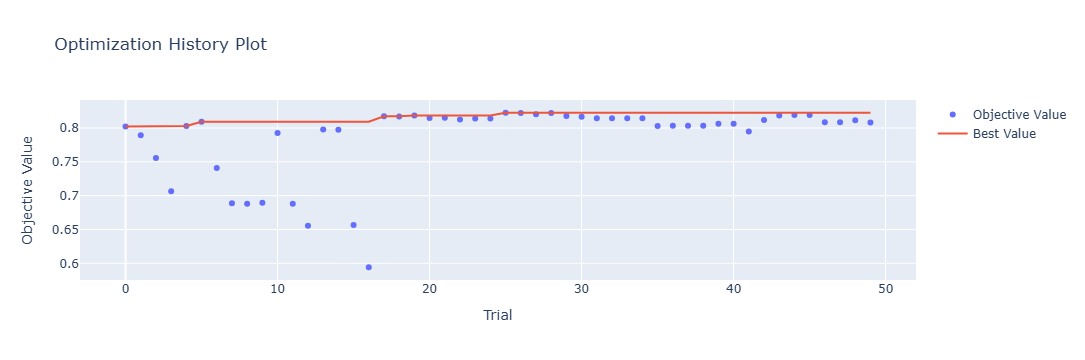

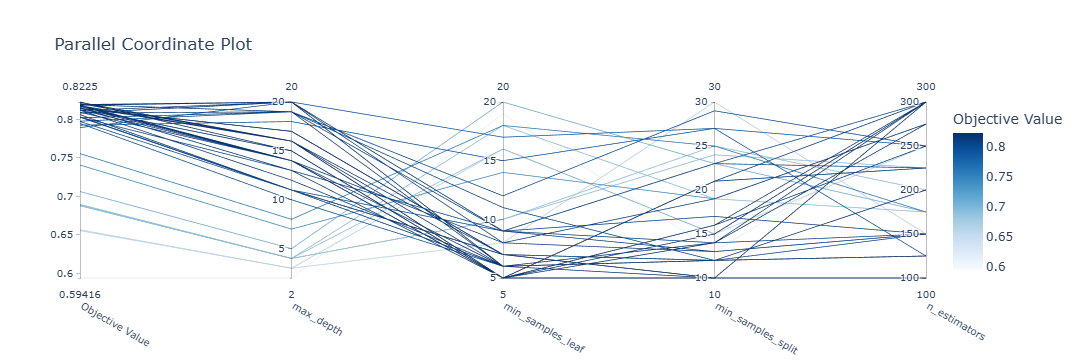

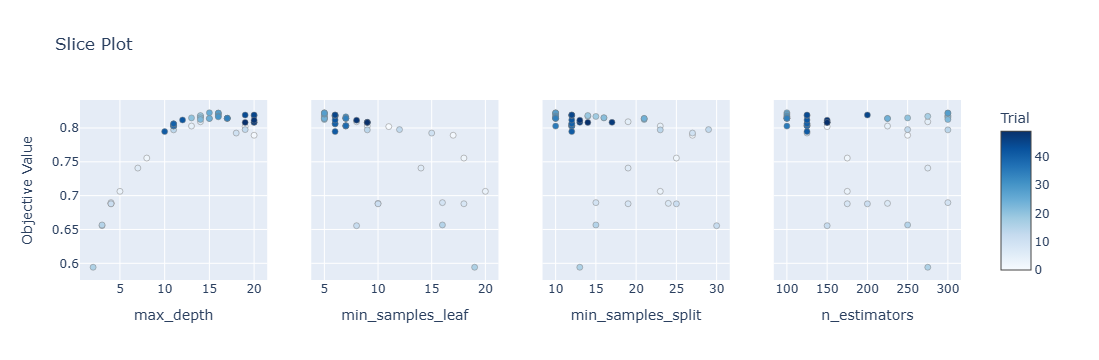

Train Accuracy: 0.9193121693121693
Test Accuracy: 0.8396164021164021


In [1165]:
X_train, X_test, y_train, y_test = train_test_split(train_data_fe, target, test_size=0.2, random_state=42) 
best_rfc_fe = run_viusalize_optuna_rfc(X_train, X_test, y_train, y_test)

 - I tried generalizing more, but Kaggle score improves with heavier overfitting.
 - Model required relatively large max_depth for performance, with max_depth = 12, I was getting about accuracy of 0.86 on train and 0.82 on test. But it was much weaker on Kaggle submission.

In [1167]:
test_data_final = test_data_fe.drop(columns='Id',axis=1)
y_pred_fe = best_rfc_fe.predict(test_data_final)

In [1169]:
save_output(test_data_fe,y_pred_fe)

## Freestyle competition

In [1093]:
import lightgbm as lgb
from lightgbm import LGBMClassifier

In [1171]:
def objective_lgbm(trial, X_train, y_train):
    # Define the hyperparameter search space
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 50, 200, step=25),
        "max_depth": trial.suggest_int("max_depth", 5, 12),
        "num_leaves": trial.suggest_int("num_leaves", 20, 50, step=10),
        "min_child_samples": trial.suggest_int("min_child_samples", 15, 30),
        "learning_rate": trial.suggest_loguniform("learning_rate", 0.1, 0.2),
        "subsample": trial.suggest_uniform("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_uniform("colsample_bytree", 0.5, 1.0),
        "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-3, 10),
        "reg_alpha": trial.suggest_loguniform("reg_alpha", 1e-3, 10)
    }

    # Initialize LGBMClassifier
    model = lgb.LGBMClassifier(**params, random_state=42, n_jobs=-1)

    # Evaluate using 5-fold cross-validation
    accuracy = cross_val_score(model, X_train, y_train, cv=5, scoring="accuracy").mean()

    if trial.number % 5 == 0:
        print(f"Trial {trial.number}: Accuracy = {accuracy:.4f}, Params = {trial.params}")

    return accuracy

In [1095]:
def run_viusalize_optuna_lgbm(X_train,  X_test, y_train, y_test):
    # Run Optuna optimization
    study = optuna.create_study(direction="maximize")
    study.optimize(lambda trial: objective(trial, X_train, y_train), n_trials=50, n_jobs=-1)
    
    # Best parameters and score
    print("Best parameters:", study.best_params)
    print("Best accuracy:", study.best_value)
    
        # Visualization of Optuna study
    vis.plot_optimization_history(study).show()
    vis.plot_parallel_coordinate(study).show()
    vis.plot_slice(study).show()


    best_lgbm = LGBMClassifier(**study.best_params, random_state=42, n_jobs=-1)
    best_lgbm.fit(X_train, y_train)
    # Evaluate accuracy on training and test data
    train_accuracy = best_lgbm.score(X_train, y_train)
    test_accuracy = best_lgbm.score(X_test, y_test)

    print('Train Accuracy:', train_accuracy)
    print('Test Accuracy:', test_accuracy)
    return best_lgbm

In [1157]:
train_data_fe

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area3,Wilderness_Area4,Soil_Type,Distance_To_Hydrology,Elevation_Cluster
0,2596,51,3,258,0,510,221,232,148,6279,1,0,0,29.0,258.000000,2
1,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,29.0,212.084889,2
2,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,12.0,275.769832,2
3,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,30.0,269.235956,2
4,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,29.0,153.003268,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15115,2607,243,23,258,7,660,170,251,214,1282,0,1,0,4.0,258.094944,2
15116,2603,121,19,633,195,618,249,221,91,1325,0,1,0,4.0,662.354890,2
15117,2492,134,25,365,117,335,250,220,83,1187,0,1,0,4.0,383.293621,0
15118,2487,167,28,218,101,242,229,237,119,932,0,1,0,4.0,240.260276,0


[I 2025-03-26 20:04:08,100] A new study created in memory with name: no-name-852b68bc-2eaa-4dc3-82b2-9934ebbcf416
[I 2025-03-26 20:04:27,204] Trial 7 finished with value: 0.8013401822349924 and parameters: {'n_estimators': 100, 'max_depth': 13, 'min_samples_split': 27, 'min_samples_leaf': 7}. Best is trial 7 with value: 0.8013401822349924.
[I 2025-03-26 20:04:29,731] Trial 5 finished with value: 0.6566645598379222 and parameters: {'n_estimators': 125, 'max_depth': 3, 'min_samples_split': 14, 'min_samples_leaf': 10}. Best is trial 7 with value: 0.8013401822349924.


Trial 5: Accuracy = 0.6567, Params = {'n_estimators': 125, 'max_depth': 3, 'min_samples_split': 14, 'min_samples_leaf': 10}


[I 2025-03-26 20:04:30,134] Trial 3 finished with value: 0.7628145637668731 and parameters: {'n_estimators': 125, 'max_depth': 8, 'min_samples_split': 18, 'min_samples_leaf': 10}. Best is trial 7 with value: 0.8013401822349924.
[I 2025-03-26 20:04:37,531] Trial 2 finished with value: 0.7428905462608345 and parameters: {'n_estimators': 175, 'max_depth': 7, 'min_samples_split': 30, 'min_samples_leaf': 9}. Best is trial 7 with value: 0.8013401822349924.
[I 2025-03-26 20:04:45,647] Trial 4 finished with value: 0.7771167991691124 and parameters: {'n_estimators': 225, 'max_depth': 9, 'min_samples_split': 17, 'min_samples_leaf': 12}. Best is trial 7 with value: 0.8013401822349924.
[I 2025-03-26 20:04:47,380] Trial 0 finished with value: 0.6569946258784622 and parameters: {'n_estimators': 250, 'max_depth': 3, 'min_samples_split': 25, 'min_samples_leaf': 10}. Best is trial 7 with value: 0.8013401822349924.


Trial 0: Accuracy = 0.6570, Params = {'n_estimators': 250, 'max_depth': 3, 'min_samples_split': 25, 'min_samples_leaf': 10}


[I 2025-03-26 20:04:50,978] Trial 6 finished with value: 0.799851656479865 and parameters: {'n_estimators': 250, 'max_depth': 17, 'min_samples_split': 22, 'min_samples_leaf': 12}. Best is trial 7 with value: 0.8013401822349924.
[I 2025-03-26 20:04:51,158] Trial 10 finished with value: 0.7837313075890249 and parameters: {'n_estimators': 100, 'max_depth': 11, 'min_samples_split': 28, 'min_samples_leaf': 16}. Best is trial 7 with value: 0.8013401822349924.


Trial 10: Accuracy = 0.7837, Params = {'n_estimators': 100, 'max_depth': 11, 'min_samples_split': 28, 'min_samples_leaf': 16}


[I 2025-03-26 20:04:58,404] Trial 1 finished with value: 0.7943953686210065 and parameters: {'n_estimators': 300, 'max_depth': 16, 'min_samples_split': 11, 'min_samples_leaf': 15}. Best is trial 7 with value: 0.8013401822349924.
[I 2025-03-26 20:04:59,512] Trial 8 finished with value: 0.7459495932681697 and parameters: {'n_estimators': 175, 'max_depth': 7, 'min_samples_split': 16, 'min_samples_leaf': 8}. Best is trial 7 with value: 0.8013401822349924.
[I 2025-03-26 20:05:08,213] Trial 13 finished with value: 0.7793492632362939 and parameters: {'n_estimators': 100, 'max_depth': 11, 'min_samples_split': 17, 'min_samples_leaf': 18}. Best is trial 7 with value: 0.8013401822349924.
[I 2025-03-26 20:05:09,431] Trial 12 finished with value: 0.7853844734693319 and parameters: {'n_estimators': 125, 'max_depth': 11, 'min_samples_split': 29, 'min_samples_leaf': 15}. Best is trial 7 with value: 0.8013401822349924.
[I 2025-03-26 20:05:16,848] Trial 9 finished with value: 0.6892364510982272 and para

Trial 15: Accuracy = 0.8125, Params = {'n_estimators': 250, 'max_depth': 14, 'min_samples_split': 22, 'min_samples_leaf': 5}


[I 2025-03-26 20:05:48,249] Trial 16 finished with value: 0.7427253253342172 and parameters: {'n_estimators': 225, 'max_depth': 7, 'min_samples_split': 25, 'min_samples_leaf': 11}. Best is trial 15 with value: 0.8125008626609589.
[I 2025-03-26 20:06:12,077] Trial 20 finished with value: 0.8112606466028239 and parameters: {'n_estimators': 200, 'max_depth': 17, 'min_samples_split': 22, 'min_samples_leaf': 5}. Best is trial 15 with value: 0.8125008626609589.


Trial 20: Accuracy = 0.8113, Params = {'n_estimators': 200, 'max_depth': 17, 'min_samples_split': 22, 'min_samples_leaf': 5}


[I 2025-03-26 20:06:12,373] Trial 21 finished with value: 0.8118394323178417 and parameters: {'n_estimators': 175, 'max_depth': 19, 'min_samples_split': 22, 'min_samples_leaf': 5}. Best is trial 15 with value: 0.8125008626609589.
[I 2025-03-26 20:06:22,124] Trial 18 finished with value: 0.8134929398460533 and parameters: {'n_estimators': 275, 'max_depth': 17, 'min_samples_split': 23, 'min_samples_leaf': 5}. Best is trial 18 with value: 0.8134929398460533.
[I 2025-03-26 20:06:23,015] Trial 19 finished with value: 0.8134928373516821 and parameters: {'n_estimators': 275, 'max_depth': 18, 'min_samples_split': 23, 'min_samples_leaf': 5}. Best is trial 18 with value: 0.8134929398460533.
[I 2025-03-26 20:06:34,025] Trial 22 finished with value: 0.8149811581180668 and parameters: {'n_estimators': 200, 'max_depth': 20, 'min_samples_split': 21, 'min_samples_leaf': 5}. Best is trial 22 with value: 0.8149811581180668.
[I 2025-03-26 20:06:39,564] Trial 23 finished with value: 0.8114261408477651 and

Trial 25: Accuracy = 0.8140, Params = {'n_estimators': 300, 'max_depth': 20, 'min_samples_split': 21, 'min_samples_leaf': 5}


[I 2025-03-26 20:07:46,162] Trial 32 finished with value: 0.8128314411733555 and parameters: {'n_estimators': 200, 'max_depth': 19, 'min_samples_split': 19, 'min_samples_leaf': 7}. Best is trial 26 with value: 0.815063734416585.
[I 2025-03-26 20:07:51,382] Trial 28 finished with value: 0.8148984109955961 and parameters: {'n_estimators': 300, 'max_depth': 20, 'min_samples_split': 20, 'min_samples_leaf': 5}. Best is trial 26 with value: 0.815063734416585.
[I 2025-03-26 20:07:52,368] Trial 29 finished with value: 0.8102685010881487 and parameters: {'n_estimators': 300, 'max_depth': 20, 'min_samples_split': 20, 'min_samples_leaf': 7}. Best is trial 26 with value: 0.815063734416585.
[I 2025-03-26 20:07:53,901] Trial 33 finished with value: 0.8120047557388306 and parameters: {'n_estimators': 150, 'max_depth': 20, 'min_samples_split': 19, 'min_samples_leaf': 7}. Best is trial 26 with value: 0.815063734416585.
[I 2025-03-26 20:07:56,664] Trial 30 finished with value: 0.813079443387234 and para

Trial 30: Accuracy = 0.8131, Params = {'n_estimators': 300, 'max_depth': 20, 'min_samples_split': 19, 'min_samples_leaf': 7}


[I 2025-03-26 20:08:08,411] Trial 31 finished with value: 0.8136583657614136 and parameters: {'n_estimators': 300, 'max_depth': 19, 'min_samples_split': 19, 'min_samples_leaf': 7}. Best is trial 26 with value: 0.815063734416585.
[I 2025-03-26 20:08:12,440] Trial 34 finished with value: 0.8128314411733555 and parameters: {'n_estimators': 200, 'max_depth': 19, 'min_samples_split': 19, 'min_samples_leaf': 7}. Best is trial 26 with value: 0.815063734416585.
[I 2025-03-26 20:08:17,254] Trial 35 finished with value: 0.810186061448792 and parameters: {'n_estimators': 200, 'max_depth': 15, 'min_samples_split': 19, 'min_samples_leaf': 7}. Best is trial 26 with value: 0.815063734416585.


Trial 35: Accuracy = 0.8102, Params = {'n_estimators': 200, 'max_depth': 15, 'min_samples_split': 19, 'min_samples_leaf': 7}


[I 2025-03-26 20:08:44,897] Trial 36 finished with value: 0.8054736094076167 and parameters: {'n_estimators': 200, 'max_depth': 15, 'min_samples_split': 25, 'min_samples_leaf': 7}. Best is trial 26 with value: 0.815063734416585.
[I 2025-03-26 20:08:45,583] Trial 38 finished with value: 0.8065485703743438 and parameters: {'n_estimators': 175, 'max_depth': 18, 'min_samples_split': 25, 'min_samples_leaf': 8}. Best is trial 26 with value: 0.815063734416585.
[I 2025-03-26 20:08:47,804] Trial 39 finished with value: 0.806217616049252 and parameters: {'n_estimators': 175, 'max_depth': 16, 'min_samples_split': 25, 'min_samples_leaf': 8}. Best is trial 26 with value: 0.815063734416585.
[I 2025-03-26 20:08:50,371] Trial 37 finished with value: 0.8151464815390554 and parameters: {'n_estimators': 200, 'max_depth': 15, 'min_samples_split': 14, 'min_samples_leaf': 7}. Best is trial 37 with value: 0.8151464815390554.
[I 2025-03-26 20:08:50,541] Trial 40 finished with value: 0.8052254363697859 and par

Trial 40: Accuracy = 0.8052, Params = {'n_estimators': 175, 'max_depth': 16, 'min_samples_split': 25, 'min_samples_leaf': 9}


[I 2025-03-26 20:09:03,072] Trial 41 finished with value: 0.8052254363697859 and parameters: {'n_estimators': 175, 'max_depth': 16, 'min_samples_split': 25, 'min_samples_leaf': 9}. Best is trial 37 with value: 0.8151464815390554.
[I 2025-03-26 20:09:04,613] Trial 42 finished with value: 0.8052254363697859 and parameters: {'n_estimators': 175, 'max_depth': 16, 'min_samples_split': 25, 'min_samples_leaf': 9}. Best is trial 37 with value: 0.8151464815390554.
[I 2025-03-26 20:09:09,423] Trial 43 finished with value: 0.8096073440633551 and parameters: {'n_estimators': 175, 'max_depth': 16, 'min_samples_split': 14, 'min_samples_leaf': 9}. Best is trial 37 with value: 0.8151464815390554.
[I 2025-03-26 20:09:23,015] Trial 45 finished with value: 0.8095245627760942 and parameters: {'n_estimators': 150, 'max_depth': 16, 'min_samples_split': 14, 'min_samples_leaf': 9}. Best is trial 37 with value: 0.8151464815390554.


Trial 45: Accuracy = 0.8095, Params = {'n_estimators': 150, 'max_depth': 16, 'min_samples_split': 14, 'min_samples_leaf': 9}


[I 2025-03-26 20:09:24,642] Trial 46 finished with value: 0.8082022487265075 and parameters: {'n_estimators': 150, 'max_depth': 18, 'min_samples_split': 14, 'min_samples_leaf': 9}. Best is trial 37 with value: 0.8151464815390554.
[I 2025-03-26 20:09:26,481] Trial 44 finished with value: 0.8081194332744561 and parameters: {'n_estimators': 175, 'max_depth': 18, 'min_samples_split': 14, 'min_samples_leaf': 9}. Best is trial 37 with value: 0.8151464815390554.
[I 2025-03-26 20:09:31,758] Trial 47 finished with value: 0.8066312833320236 and parameters: {'n_estimators': 225, 'max_depth': 18, 'min_samples_split': 10, 'min_samples_leaf': 9}. Best is trial 37 with value: 0.8151464815390554.
[I 2025-03-26 20:09:32,062] Trial 48 finished with value: 0.8182878656913758 and parameters: {'n_estimators': 225, 'max_depth': 18, 'min_samples_split': 10, 'min_samples_leaf': 6}. Best is trial 48 with value: 0.8182878656913758.
[I 2025-03-26 20:09:33,164] Trial 49 finished with value: 0.8182878656913758 and

Best parameters: {'n_estimators': 225, 'max_depth': 18, 'min_samples_split': 10, 'min_samples_leaf': 6}
Best accuracy: 0.8182878656913758


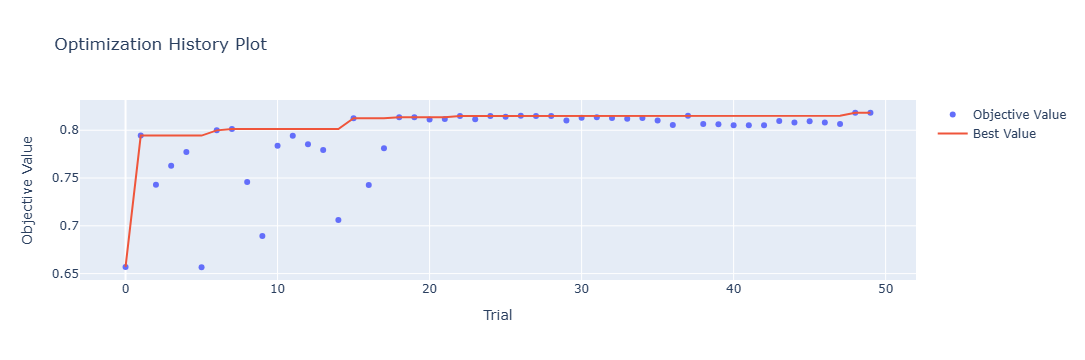

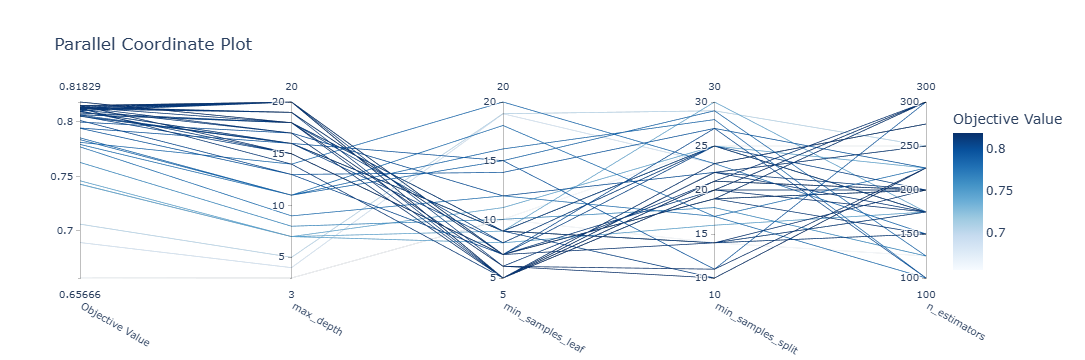

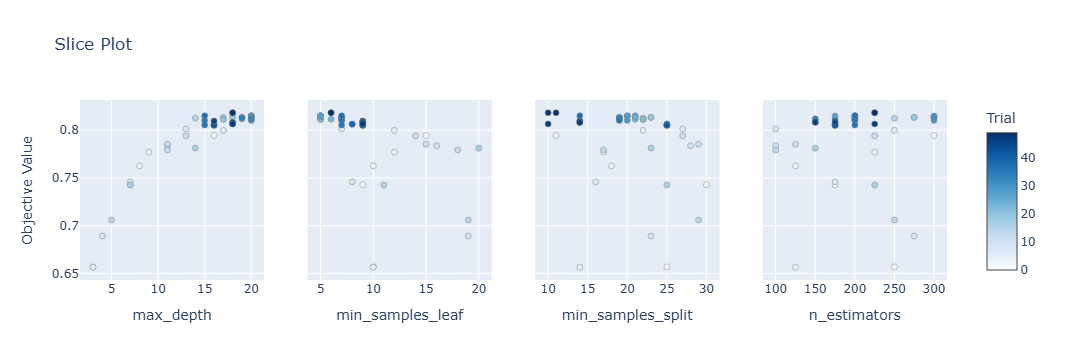

[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=6. Current value: min_data_in_leaf=6
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=6. Current value: min_data_in_leaf=6
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001250 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1833
[LightGBM] [Info] Number of data points in the train set: 12096, number of used features: 13
[LightGBM] [Info] Start training from score -1.939565
[LightGBM] [Info] Start training from score -1.949388
[LightGBM] [Info] Start training from score -1.943598
[LightGBM] [Info] Start training from score -1.955797
[LightGBM] [Info] Start training from score -1.936693
[LightGBM] [Info] Start train

In [1173]:
best_lgbm = run_viusalize_optuna_lgbm(X_train,X_test,y_train,y_test)


In [1175]:
test_data_final = test_data_fe.drop(columns='Id',axis=1)
y_pred_fe = best_lgbm.predict(test_data_final)
save_output(test_data_fe,y_pred_fe)

[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=6. Current value: min_data_in_leaf=6
